# 🔭 Space Segregation

In [380]:
from space_seg.space_seg_classes import *

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [198]:
plt.rcParams.update({'font.size': 18})

In [2]:
gen_fams_dict = {
    # Canonical
    "PA": {
        "k": {
            "generator_path": GEN_PATH+"k.gen",
            "number_generated":N_GRAPHS
        }
    },
    "ER": {
        "c1": {
            "generator_path": GEN_PATH+"c1.gen",
            "number_generated":N_GRAPHS
        },
    },
    "ID": {
        "id": {
            "generator_path": GEN_PATH+"id.gen",
            "number_generated":N_GRAPHS
        }
    },
    "d": {
        "d": {
            "generator_path": GEN_PATH+"d.gen",
            "number_generated":N_GRAPHS
        }
    },
    
    # 2014 — undirected

    #"PG": {
    #    "grid": {
    #        "generator_path": GEN_PATH+"power_grid.gen",
    #        "number_generated":N_GRAPHS
    #    }
    #},
    #"FB": {
    #    "fb": {
    #        "generator_path": GEN_PATH+"facebook.gen",
    #        "number_generated":N_GRAPHS
    #    }
    #},
    #"P": {
    #    "prot": {
    #        "generator_path": GEN_PATH+"proteins.gen",
    #        "number_generated":N_GRAPHS
    #    }
    #},
    #"WA": {
    #    "word": {
    #        "generator_path": GEN_PATH+"words.gen",
    #        "number_generated":N_GRAPHS
    #    }
    #},

    #"PA'": {
    #    "k^k": {
    #        "generator_path": GEN_PATH+"k^k.gen",
    #        "number_generated":N_GRAPHS
    #    }
    #},
    
    #"SC": {
    #    "SC-a": {
    #        "generator_path": GEN_PATH+"sc-a2.gen",
    #        "number_generated":N_GRAPHS
    #    }
    #},
    #"SF": {
    #    "SF": {
    #        "generator_path": GEN_PATH+"e-d.gen",
    #        "number_generated":N_GRAPHS
    #    }
    #}
    #"predict": {
    #    "words": {
    #        "generator_path": GEN_PATH+"words_paper.gen",
    #        "number_generated":N_GRAPHS
    #    }
    #},
}


"""
ve_values = [
    #(500, 5000),
    (500, 5000),
    #(20, 40),
    #(30, 60),
    #(40, 80),
    #(50, 100),
    #(60, 120),
]
"""



"""

n_min, n_max, v_step = 100, 1000, 100
m_min, m_max, e_step = 1000, 10000, 1000

v_values = np.arange(n_min, n_max+v_step, v_step)
e_values = np.arange(m_min, m_max+e_step, e_step)
#e_values = 2*v_values

ve_values = [(v, e) for v in v_values for e in e_values
             if coherent_max_edges(nodes=v, edges=e)
            ]
"""

v_values = [
    50,
    100,
    500,
    #1000,
    #5000,
]

ve_values = [(v, e) for v in v_values for e in numbers_of_edges(v
                                                                #, np.linspace(0.01, .5, 50)
                                                                , [0.01
                                                                   , 0.05
                                                                   , 0.1
                                                                   , 0.5
                                                                  ]
                                                               )
             if coherent_max_edges(nodes=v, edges=e) #and e<100000
            ]

In [22]:
generated_nodes = np.arange(100, 1100, 100)[:6]
generated_densities = np.linspace(0.001, 0.2, 10)

MIN_AV_DEG = 5
MAX_AV_DEG = 200

print(generated_nodes)
print(generated_densities)

[100 200 300 400 500 600]
[0.001      0.02311111 0.04522222 0.06733333 0.08944444 0.11155556
 0.13366667 0.15577778 0.17788889 0.2       ]


In [23]:
ve_values = [
    (v, e)  
    for v in generated_nodes
    for e in numbers_of_edges(v
                              , densities = generated_densities
                             )
    if (
        coherent_max_edges(nodes=v, edges=e)
        and av_deg(v, e) >= MIN_AV_DEG
        and av_deg(v, e) <= MAX_AV_DEG
    )
]

In [24]:
len(ve_values)

51

In [25]:
for n in generated_nodes:
    edges_for_n = [ne[1] for ne in ve_values if ne[0]==n]
    print(n, "({})".format(len(edges_for_n)))
    for e in edges_for_n:
        print("  {} ({})".format(e, av_deg(n,e)))

100 (7)
  333 (6.66)
  443 (8.86)
  552 (11.04)
  662 (13.24)
  771 (15.42)
  881 (17.62)
  990 (19.8)
200 (8)
  900 (9.0)
  1340 (13.4)
  1780 (17.8)
  2220 (22.2)
  2660 (26.6)
  3100 (31.0)
  3540 (35.4)
  3980 (39.8)
300 (9)
  1037 (6.913333333333333)
  2028 (13.52)
  3020 (20.133333333333333)
  4012 (26.746666666666666)
  5003 (33.35333333333333)
  5995 (39.96666666666667)
  6987 (46.58)
  7978 (53.18666666666667)
  8970 (59.8)
400 (9)
  1844 (9.22)
  3609 (18.045)
  5373 (26.865)
  7138 (35.69)
  8902 (44.51)
  10667 (53.335)
  12431 (62.155)
  14196 (70.98)
  15960 (79.8)
500 (9)
  2883 (11.532)
  5641 (22.564)
  8400 (33.6)
  11158 (44.632)
  13917 (55.668)
  16675 (66.7)
  19433 (77.732)
  22192 (88.768)
  24950 (99.8)
600 (9)
  4153 (13.843333333333334)
  8126 (27.086666666666666)
  12100 (40.333333333333336)
  16073 (53.57666666666667)
  20047 (66.82333333333334)
  24020 (80.06666666666666)
  27993 (93.31)
  31967 (106.55666666666667)
  35940 (119.8)


In [26]:
nb_gens = 0
for fam_dict_name, fam_dict in gen_fams_dict.items():
    print(fam_dict_name)
    for gen_name, gen_inf in fam_dict.items():
        count = gen_inf["number_generated"]
        print("\t> {n} ({c})".format(n=gen_name, c=count))
        nb_gens += count
        
print("\nNumber of graphs to be generated : {}.".format(nb_gens*len(ve_values)))

PA
	> k (64)
ER
	> c1 (64)
ID
	> id (64)
d
	> d (64)

Number of graphs to be generated : 13056.


## 🗂 Generating files

In [27]:
%%capture
netgen = SynNetsGenerator(
    generator_dict=gen_fams_dict,
    ve_pairs_list=ve_values,
    compute_files=True, # SET To ` True ` to generate the network files
    do_overwrite = False, # SET To ` True ` to RE-generate the network files
    check_load=True, # Set to `True` to still RE-generate empty files
)

#netgen.init_files()

## 📍 Computing embeddings

In [138]:
embdegs = load_embedder(
    "DL_module/saved/best_models/trad_degs/"
)

In [139]:
%%time

netemb = netgen.make_embedder(
    **{
        "embedding_method": lambda net: embed_deep(net, embedder_method=embdegs),
        #"reducer": TSNE()#PCA(n_components=2)
    }
)

CPU times: user 15min 47s, sys: 32.5 s, total: 16min 20s
Wall time: 16min 38s


## 🧮 Analysis of the results

In [140]:
netana = netemb.make_analyzer()

### 🎱 Classification

In [141]:
netana.classify()

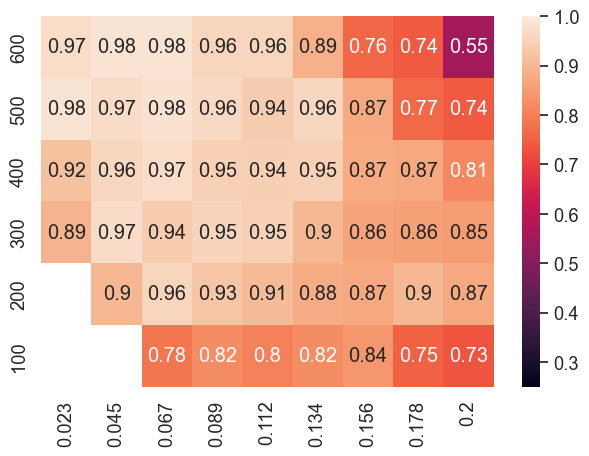

In [187]:
sns.set(font_scale=1.2, style='white')

sns.heatmap(
    netana.get_overall_scores(
        get_score="Micro-F1",
        common_p=True
    ),#[::-1],
    vmin = 0.25, vmax=1,
    annot=True
)

plt.xticks(rotation=90) 
plt.tight_layout()
#plt.savefig("illustrations/space_seg/classification_degs.png")
plt.show()

### 🎨 Visualisation

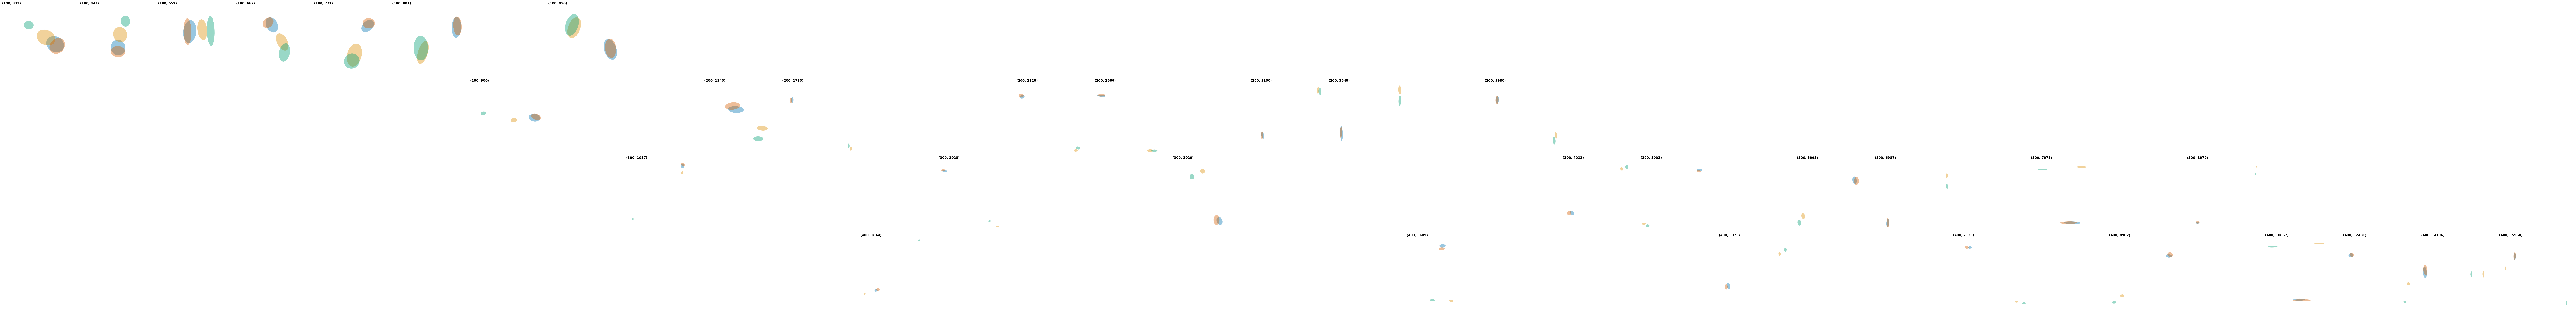

In [12]:
fig = netana.visualise(visualise_ve=visualise_gmm, dark_mode=False, return_fig = True)
#plt.savefig("./illustrations/deg_space_seg_dm.png", transparent=True)

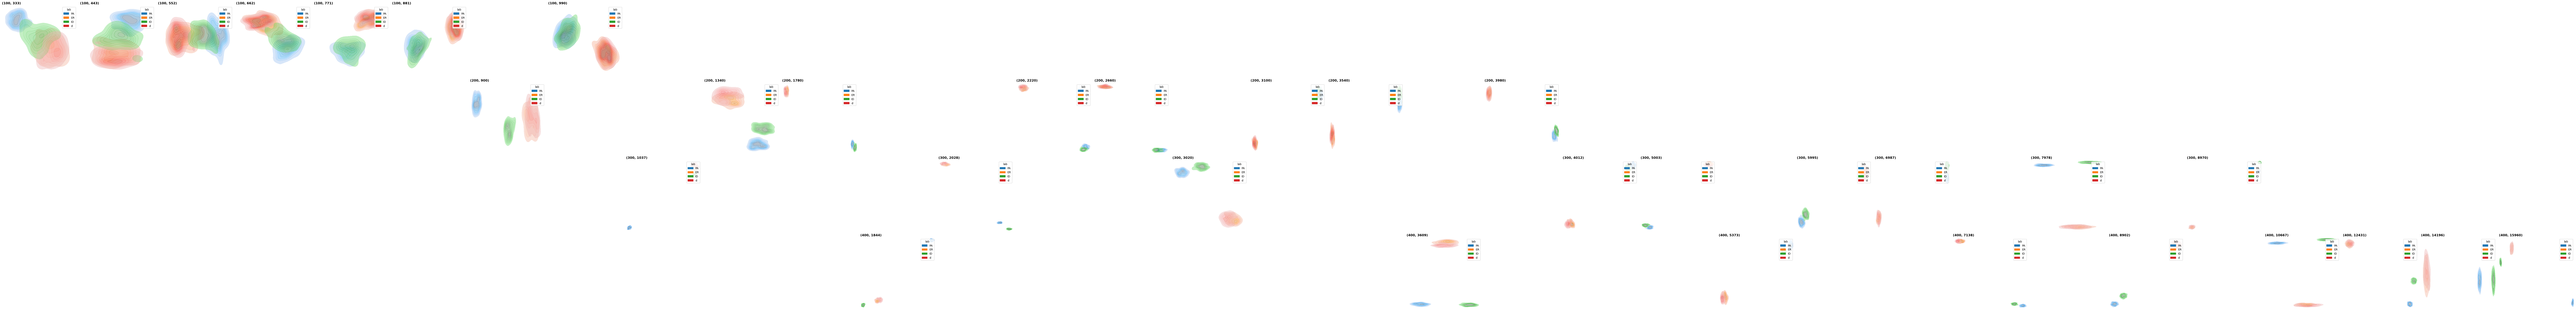

In [13]:
netana.visualise(visualise_ve=visualise_kde)

### 💯 Computing scores

In [143]:
netana.compute_scores()

In [144]:
test_ovs = netana.get_overall_scores(
    common_p = True
)

In [174]:
netana.get_overall_scores(common_p=True)#[::-1]

0.023     0.045     0.067     0.089     0.112     0.134     0.156  \
600  0.260056  0.179378  0.177981  0.313073  0.256017  0.394190  0.377822   
500  0.274440  0.166472  0.158304  0.104919  0.299572  0.236945  0.363424   
400  0.243093  0.171820  0.123478  0.139541  0.090332  0.255228  0.221528   
300  0.201252  0.177456  0.107601  0.087221  0.092077  0.101811  0.059319   
200       NaN  0.151500  0.122896  0.081289  0.062998  0.040005  0.046887   
100       NaN       NaN  0.059843  0.059302  0.043279  0.038263  0.031661   

        0.178     0.200  
600  0.211214 -0.039349  
500  0.375623  0.276934  
400  0.178851  0.343713  
300  0.200399  0.219983  
200  0.059613  0.056824  
100  0.017833  0.011266

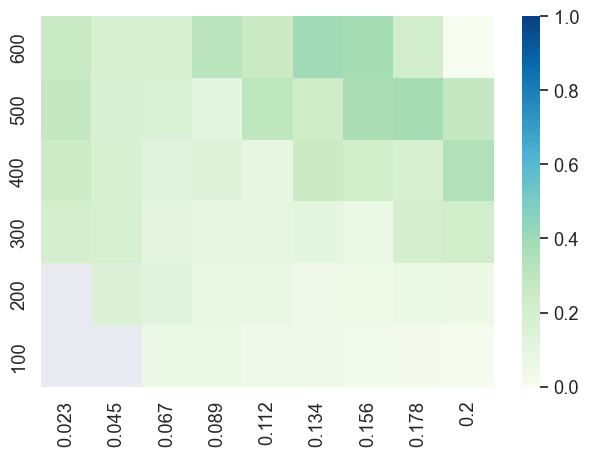

In [177]:
netana.plot_overall_scores()

plt.tight_layout()
#plt.savefig("illustrations/space_seg/ov_silhouette_degs.png")

In [184]:
fam2color_dict = {
    "PA": 'blue',
    "ER": 'orange',
    "ID": 'green',
    "d": 'purple',
    
    "SC": 'brown',
    "SF": 'pink',
    "PA'": 'red',
    
    "FB":"darkblue",
    "P":"lightcoral",
    "PG":"limegreen",
    "WA":'grey',
}

In [189]:
sns.reset_defaults()

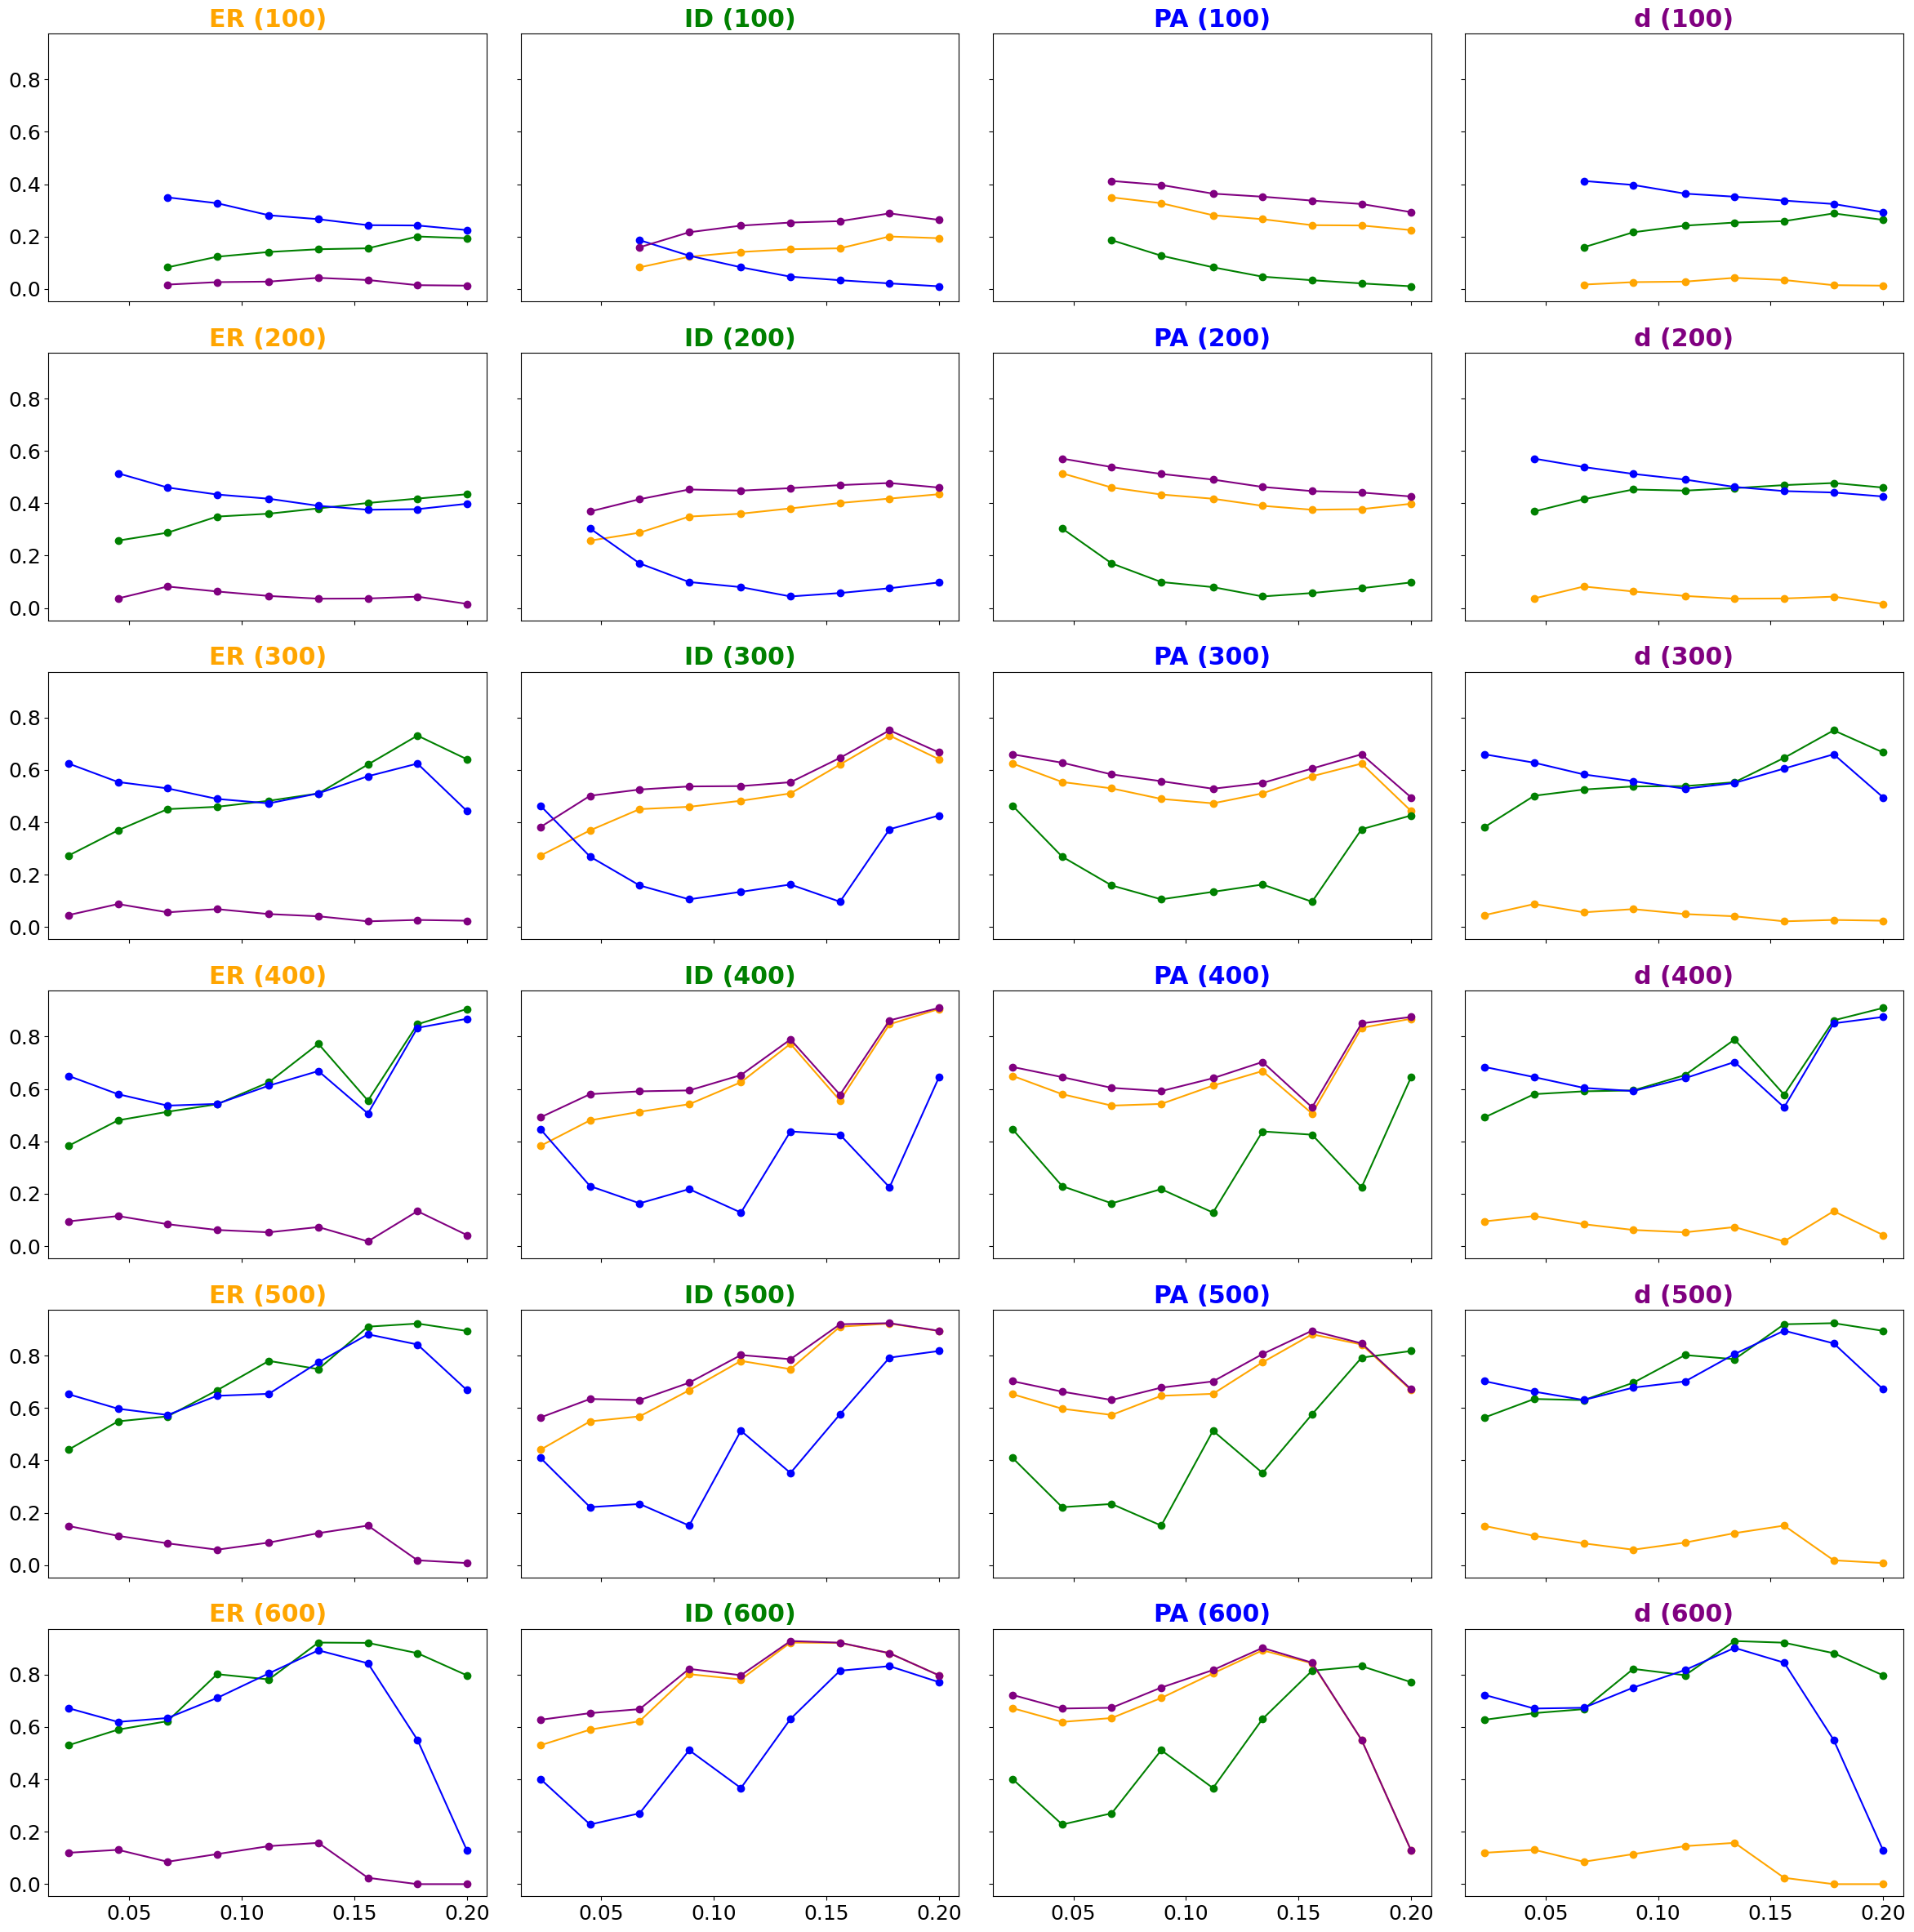

In [200]:
netana.plot_families_scores(
    fam_to_color_dict=fam2color_dict
)

plt.tight_layout()
#plt.savefig("illustrations/space_seg/pw_silhouette_degs.png")
plt.show()

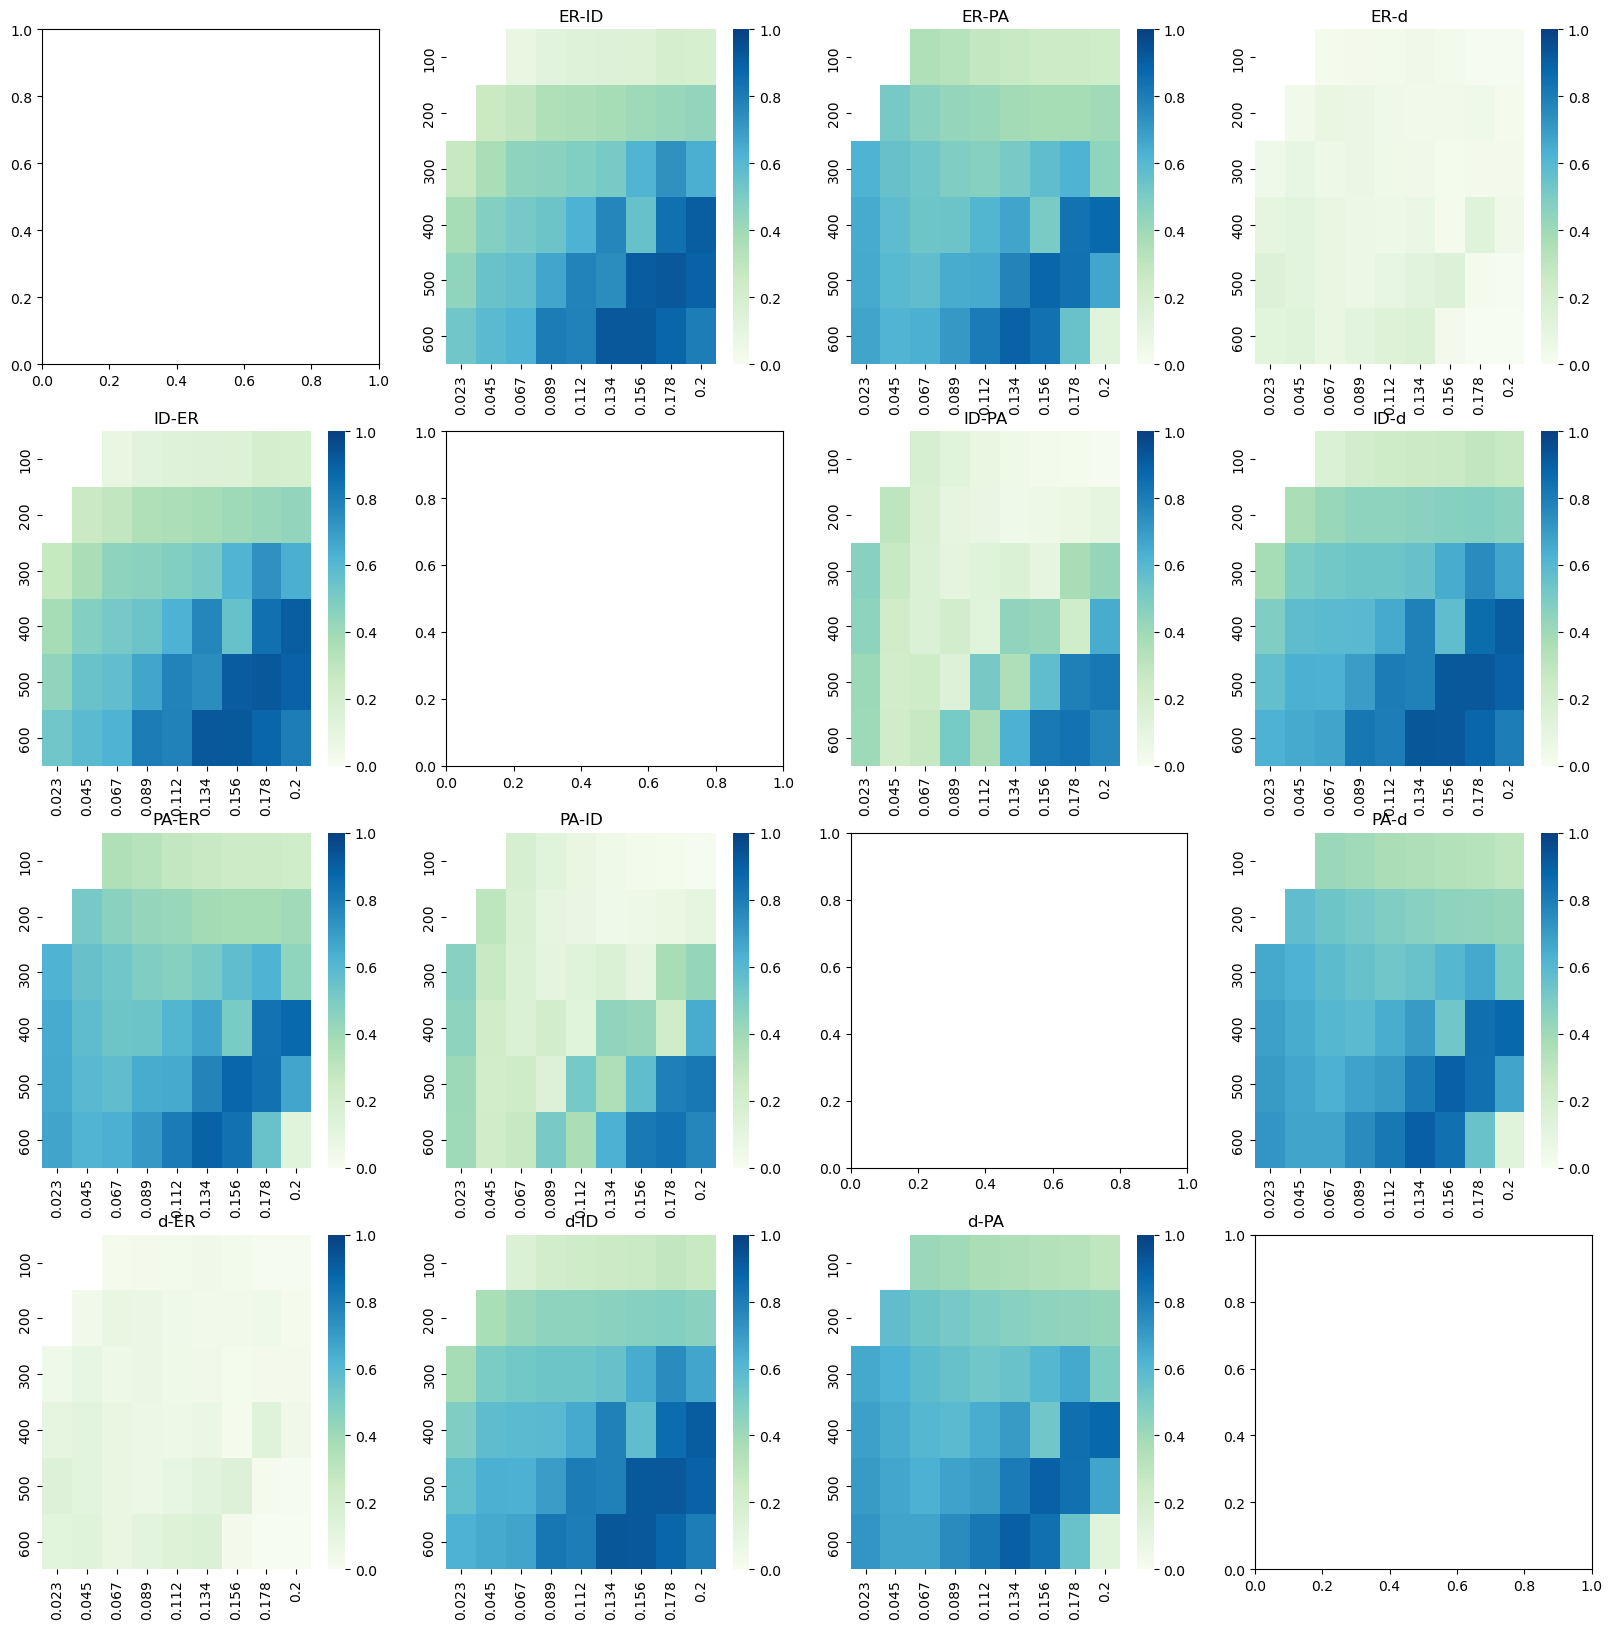

In [19]:
netana.plot_pairwise_scores(
)

# 🌊 Using Trained Models

## PGCL

In [33]:
pgcl_emb = load_embedder(
    "DL_module/saved/best_models/PGCL/"
)

In [121]:
%%time

pgcl_netemb = netgen.make_embedder(
    **{
        "embedding_method": lambda net: embed_deep(net, embedder_method=pgcl_emb),
        #"reducer": TSNE(),#"reducer": PCA(n_components=2),#
    }
)

/Users/nmm/Desktop/CMB_CSS_PDM/main_project/./DL_module/Models/model_util.py:151: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  batch = torch.tensor(batch, dtype=int)


CPU times: user 16min 53s, sys: 48.8 s, total: 17min 41s
Wall time: 1h 9min 5s


In [122]:
pgcl_netana = pgcl_netemb.make_analyzer()

In [123]:
pgcl_netana.classify()

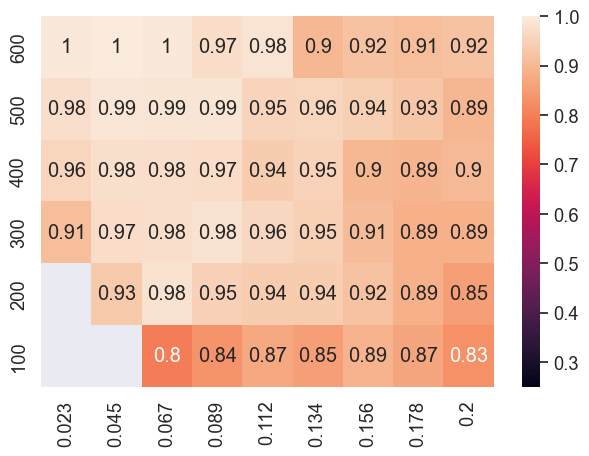

In [124]:
sns.heatmap(
    pgcl_netana.get_overall_scores(
        get_score="Micro-F1",
        common_p=True
    )#[::-1],
    vmin = 0.25, vmax=1,
    annot=True
)
plt.xticks(rotation=90) 
plt.tight_layout()
#plt.savefig("illustrations/space_seg/classification_pgcl.png")
plt.show()

In [65]:
len(pgcl_netana.ve_dicts[(100, 333)]["embs"][0])

64

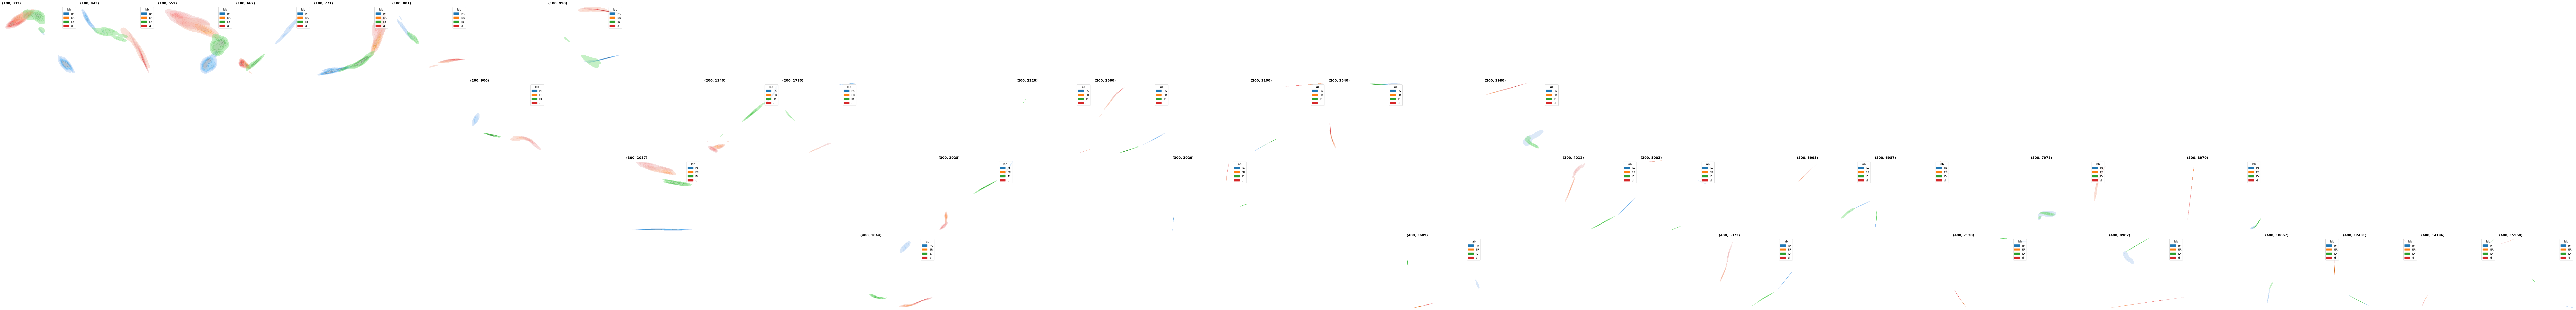

In [23]:
if len(pgcl_netana.ve_dicts[(100, 333)]["embs"][0])==2:
    pgcl_netana.visualise(visualise_ve=visualise_kde)

In [125]:
pgcl_netana.compute_scores()

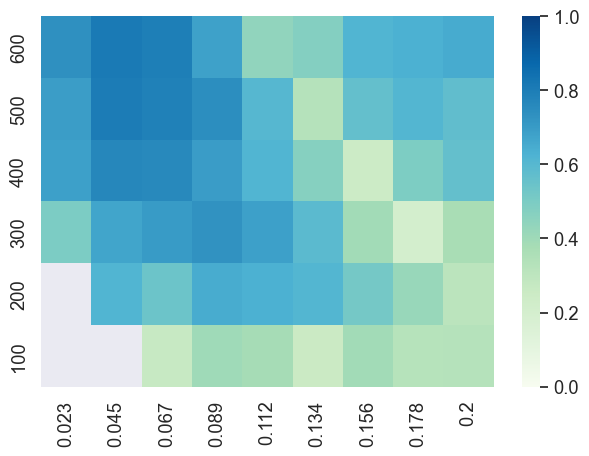

In [179]:
pgcl_netana.plot_overall_scores()

plt.tight_layout()
#plt.savefig("illustrations/space_seg/ov_silhouette_pgcl.png")

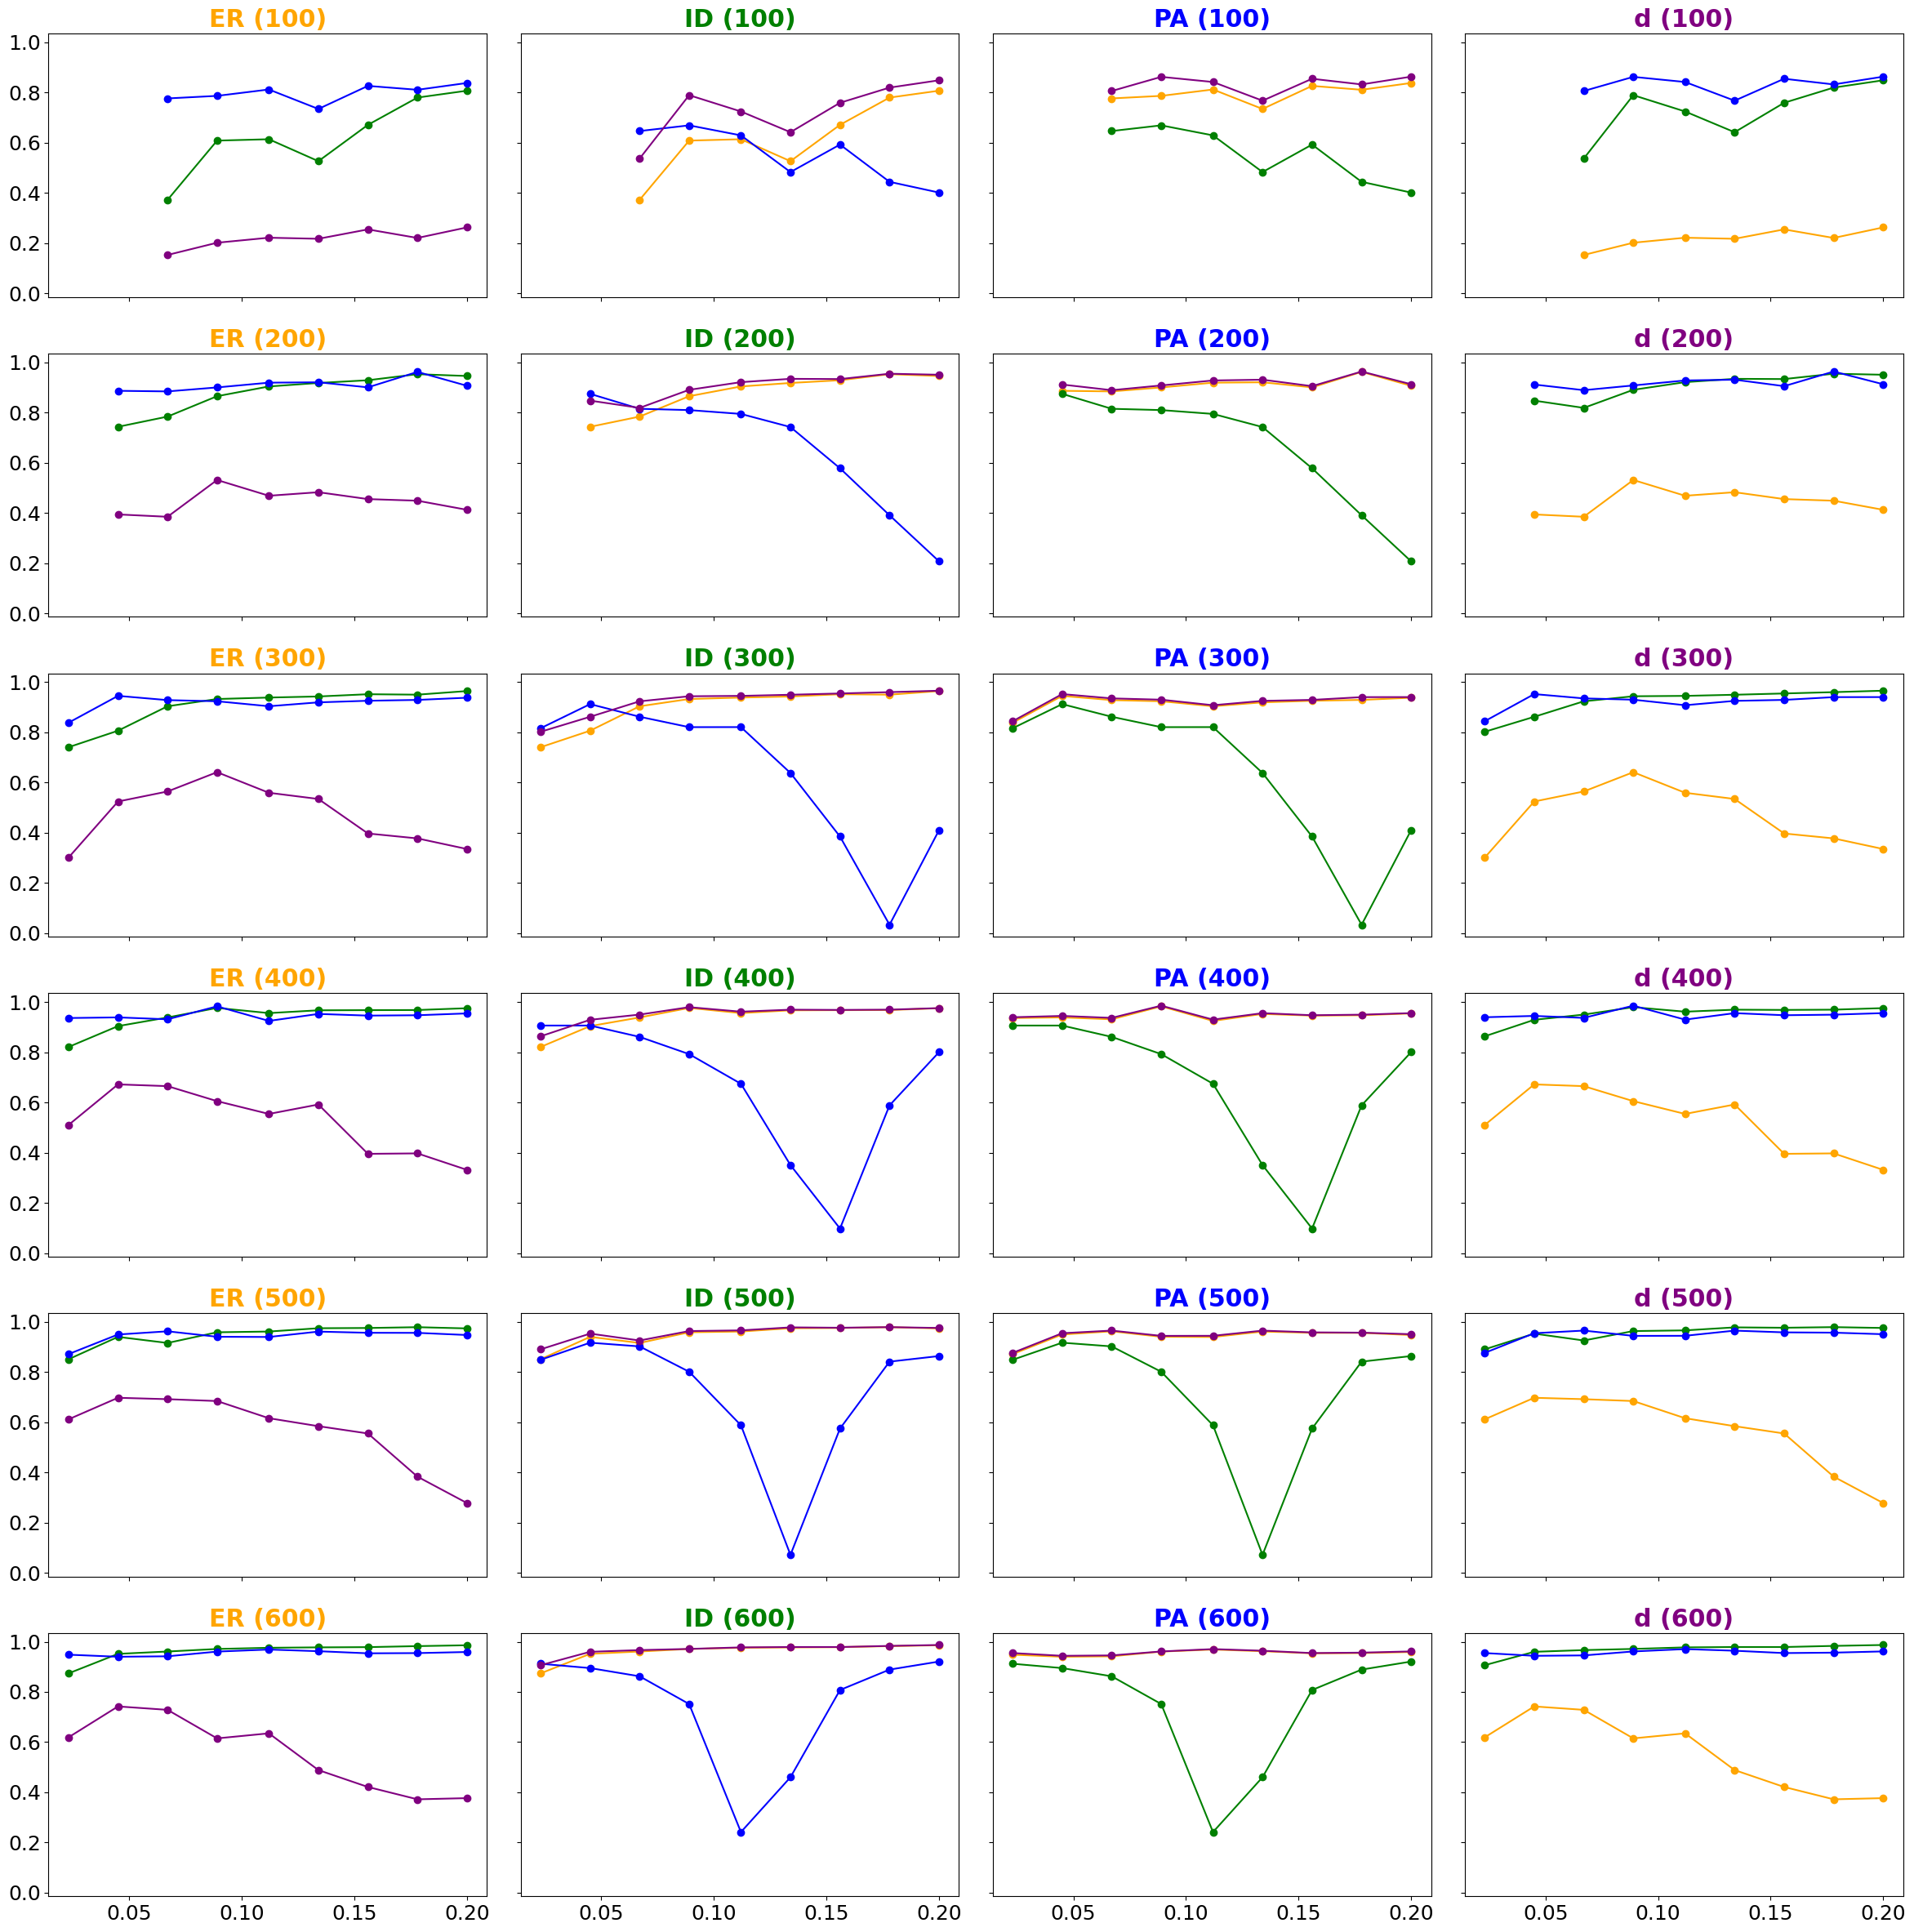

In [202]:
pgcl_netana.plot_families_scores(
    fam_to_color_dict=fam2color_dict
)

plt.tight_layout()
#plt.savefig("illustrations/space_seg/pw_silhouette_pgcl.png")
plt.show()

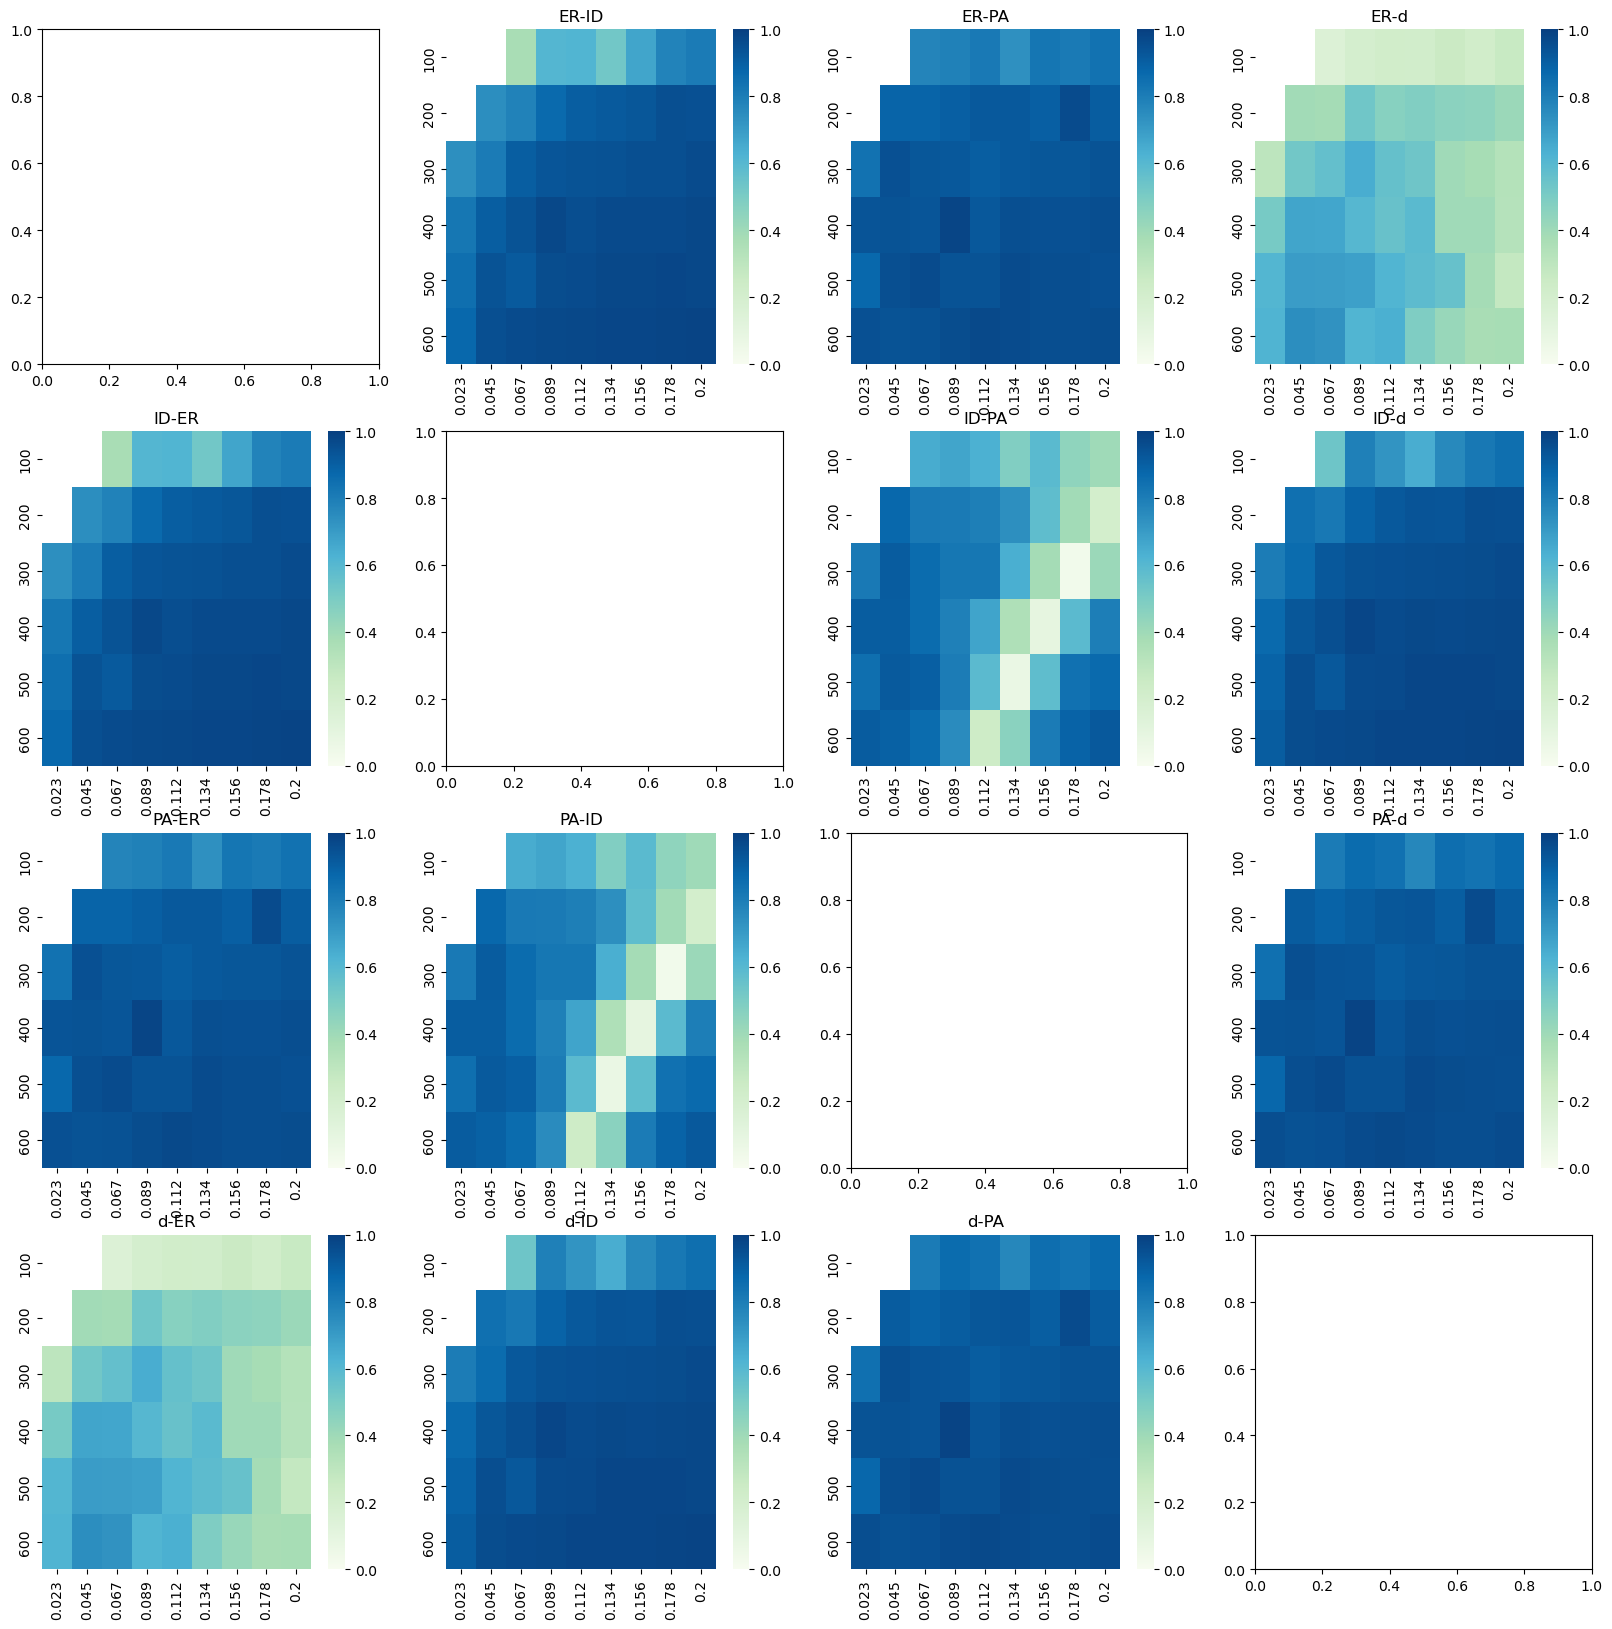

In [26]:
pgcl_netana.plot_pairwise_scores(
)

## GraphMAE

In [130]:
graphmae_emb = load_embedder(
    "DL_module/saved/best_models/GraphMAE/"
)

In [131]:
%%time

graphmae_netemb = netgen.make_embedder(
    **{
        "embedding_method": lambda net: embed_deep(net, embedder_method=graphmae_emb),
        #"reducer": TSNE(),#"reducer": PCA(n_components=2),#
    }
)

CPU times: user 16min 29s, sys: 34.2 s, total: 17min 4s
Wall time: 17min 15s


In [132]:
graphmae_netemb.reduce

False

In [133]:
graphmae_netana = graphmae_netemb.make_analyzer()

In [134]:
graphmae_netana.classify()

In [208]:
from matplotlib.patches import Rectangle

In [349]:
graphmae_acc = graphmae_netana.get_overall_scores(get_score="Micro-F1",common_p=True)#[::-1]
pgcl_acc = pgcl_netana.get_overall_scores(get_score="Micro-F1",common_p=True)#[::-1]
degs_acc = netana.get_overall_scores(get_score="Micro-F1",common_p=True)#[::-1]

l=[graphmae_acc,pgcl_acc,degs_acc]


DF=pd.concat(l,keys=range(len(l))).groupby(level=1)

maxdf=DF.max()
maxdf = maxdf.sort_index(ascending=False)
maxdf

0.023     0.045     0.067     0.089     0.112     0.134     0.156  \
600  0.996154  1.000000  0.996000  0.972769  0.984308  0.898308  0.918154   
500  0.984462  0.988308  0.988154  0.988154  0.953231  0.960923  0.941692   
400  0.957077  0.976769  0.976462  0.972615  0.941846  0.953077  0.898154   
300  0.909846  0.972615  0.976308  0.980308  0.960923  0.945077  0.906615   
200       NaN  0.933385  0.980308  0.949385  0.937077  0.937385  0.918308   
100       NaN       NaN  0.797077  0.835538  0.870923  0.851231  0.890154   

        0.178     0.200  
600  0.910154  0.918000  
500  0.925538  0.894615  
400  0.894308  0.902154  
300  0.886462  0.887538  
200  0.898769  0.870923  
100  0.866923  0.828308

In [362]:
isbest = maxdf == degs_acc
isbest

0.023  0.045  0.067  0.089  0.112  0.134  0.156  0.178  0.200
600  False  False  False  False  False  False  False  False  False
500   True  False  False  False  False   True  False  False  False
400  False  False  False  False   True  False  False  False  False
300  False  False  False  False  False  False  False  False  False
200  False  False  False  False  False  False  False   True   True
100  False  False  False  False  False  False  False  False  False

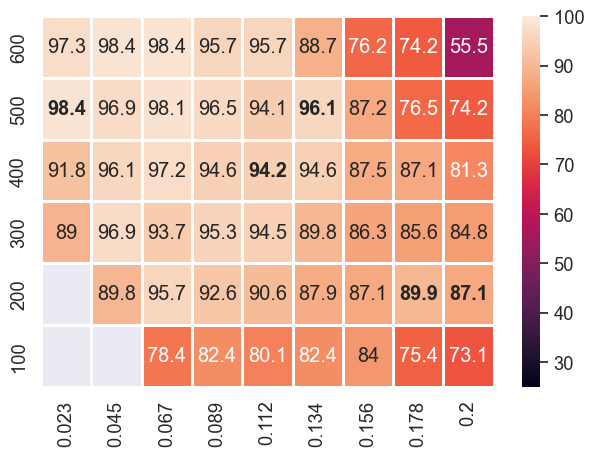

In [363]:
#sns.set(font_scale=1.2)
"""
ax = sns.heatmap(
    graphmae_acc*100,
    vmin = 25, vmax=100,
    annot=True,
    #annot_kws={"fontsize":12},
    #cbar=False,
    fmt='.3g',
    lw=1
)
"""

sns.heatmap(degs_acc*100,
            vmin = 25, vmax=100,
            mask= isbest,
            linewidth=1,
            fmt='.3g',
            annot=True,
            #xticklabels=my_x_tick_labels,
            #yticklabels=my_y_tick_labels,
            #cmap="coolwarm_r"
           )

sns.heatmap(degs_acc*100,
            vmin = 25, vmax=100,
            mask=~isbest,
            fmt='.3g',
            annot_kws={"weight": "bold"},
            linewidth=1,
            annot=True,
            #xticklabels=my_x_tick_labels,
            #yticklabels=my_y_tick_labels,
            cbar=False,
            #cmap="coolwarm_r"
           )

"""
for p in best_ids:

    ax.add_patch(Rectangle(p#(3, 4)
                           , 1, 1
                           , fill=False
                           , edgecolor='blue'
                           , lw=2
                          )
                )
"""

plt.xticks(rotation=90)#45, ha='right') 
plt.tight_layout()
#plt.yticks(fontsize=12)
plt.savefig("illustrations/space_seg/classification_degs_v2.png")
plt.show()

In [60]:
len(graphmae_netana.ve_dicts[(100, 333)]["embs"][0])

64

In [383]:
sns.reset_defaults()

/Users/nmm/miniforge3/envs/env_gdl/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/nmm/miniforge3/envs/env_gdl/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


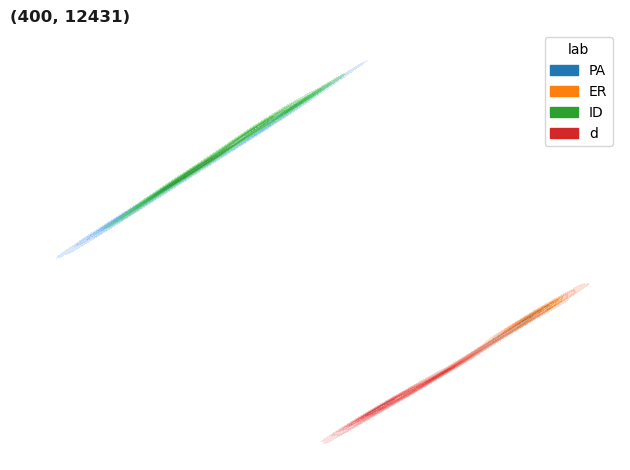

In [410]:
pgcl_netana.single_viz(
    ve=(400, 12431),
    visualisation_method=visualise_kde,
    reducer = TSNE()
    #ax=curr_ax,#axes[i,j],
    #title=ve,
    #dark_mode = dark_mode
)

plt.tight_layout()
#plt.savefig("illustrations/space_seg/tsne_kde_v400_e12431_pgcl.png")
plt.show()

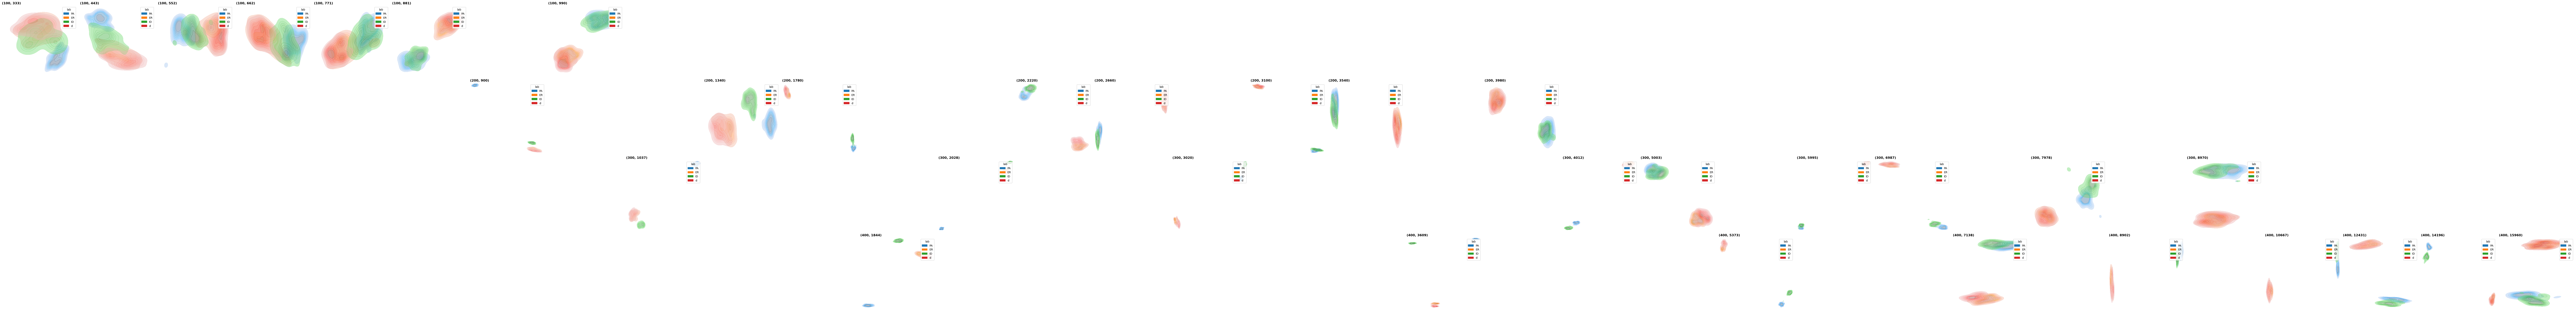

In [31]:
if len(graphmae_netana.ve_dicts[(100, 333)]["embs"][0])==2:
    graphmae_netana.visualise(visualise_ve=visualise_kde)

In [136]:
graphmae_netana.compute_scores()

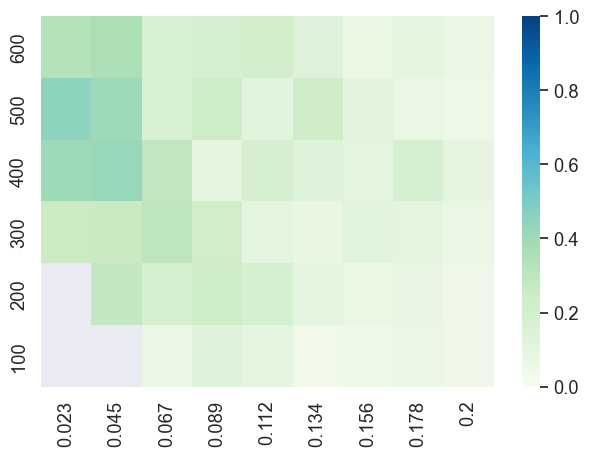

In [181]:
graphmae_netana.plot_overall_scores()

plt.tight_layout()
#plt.savefig("illustrations/space_seg/ov_silhouette_graphmae.png")

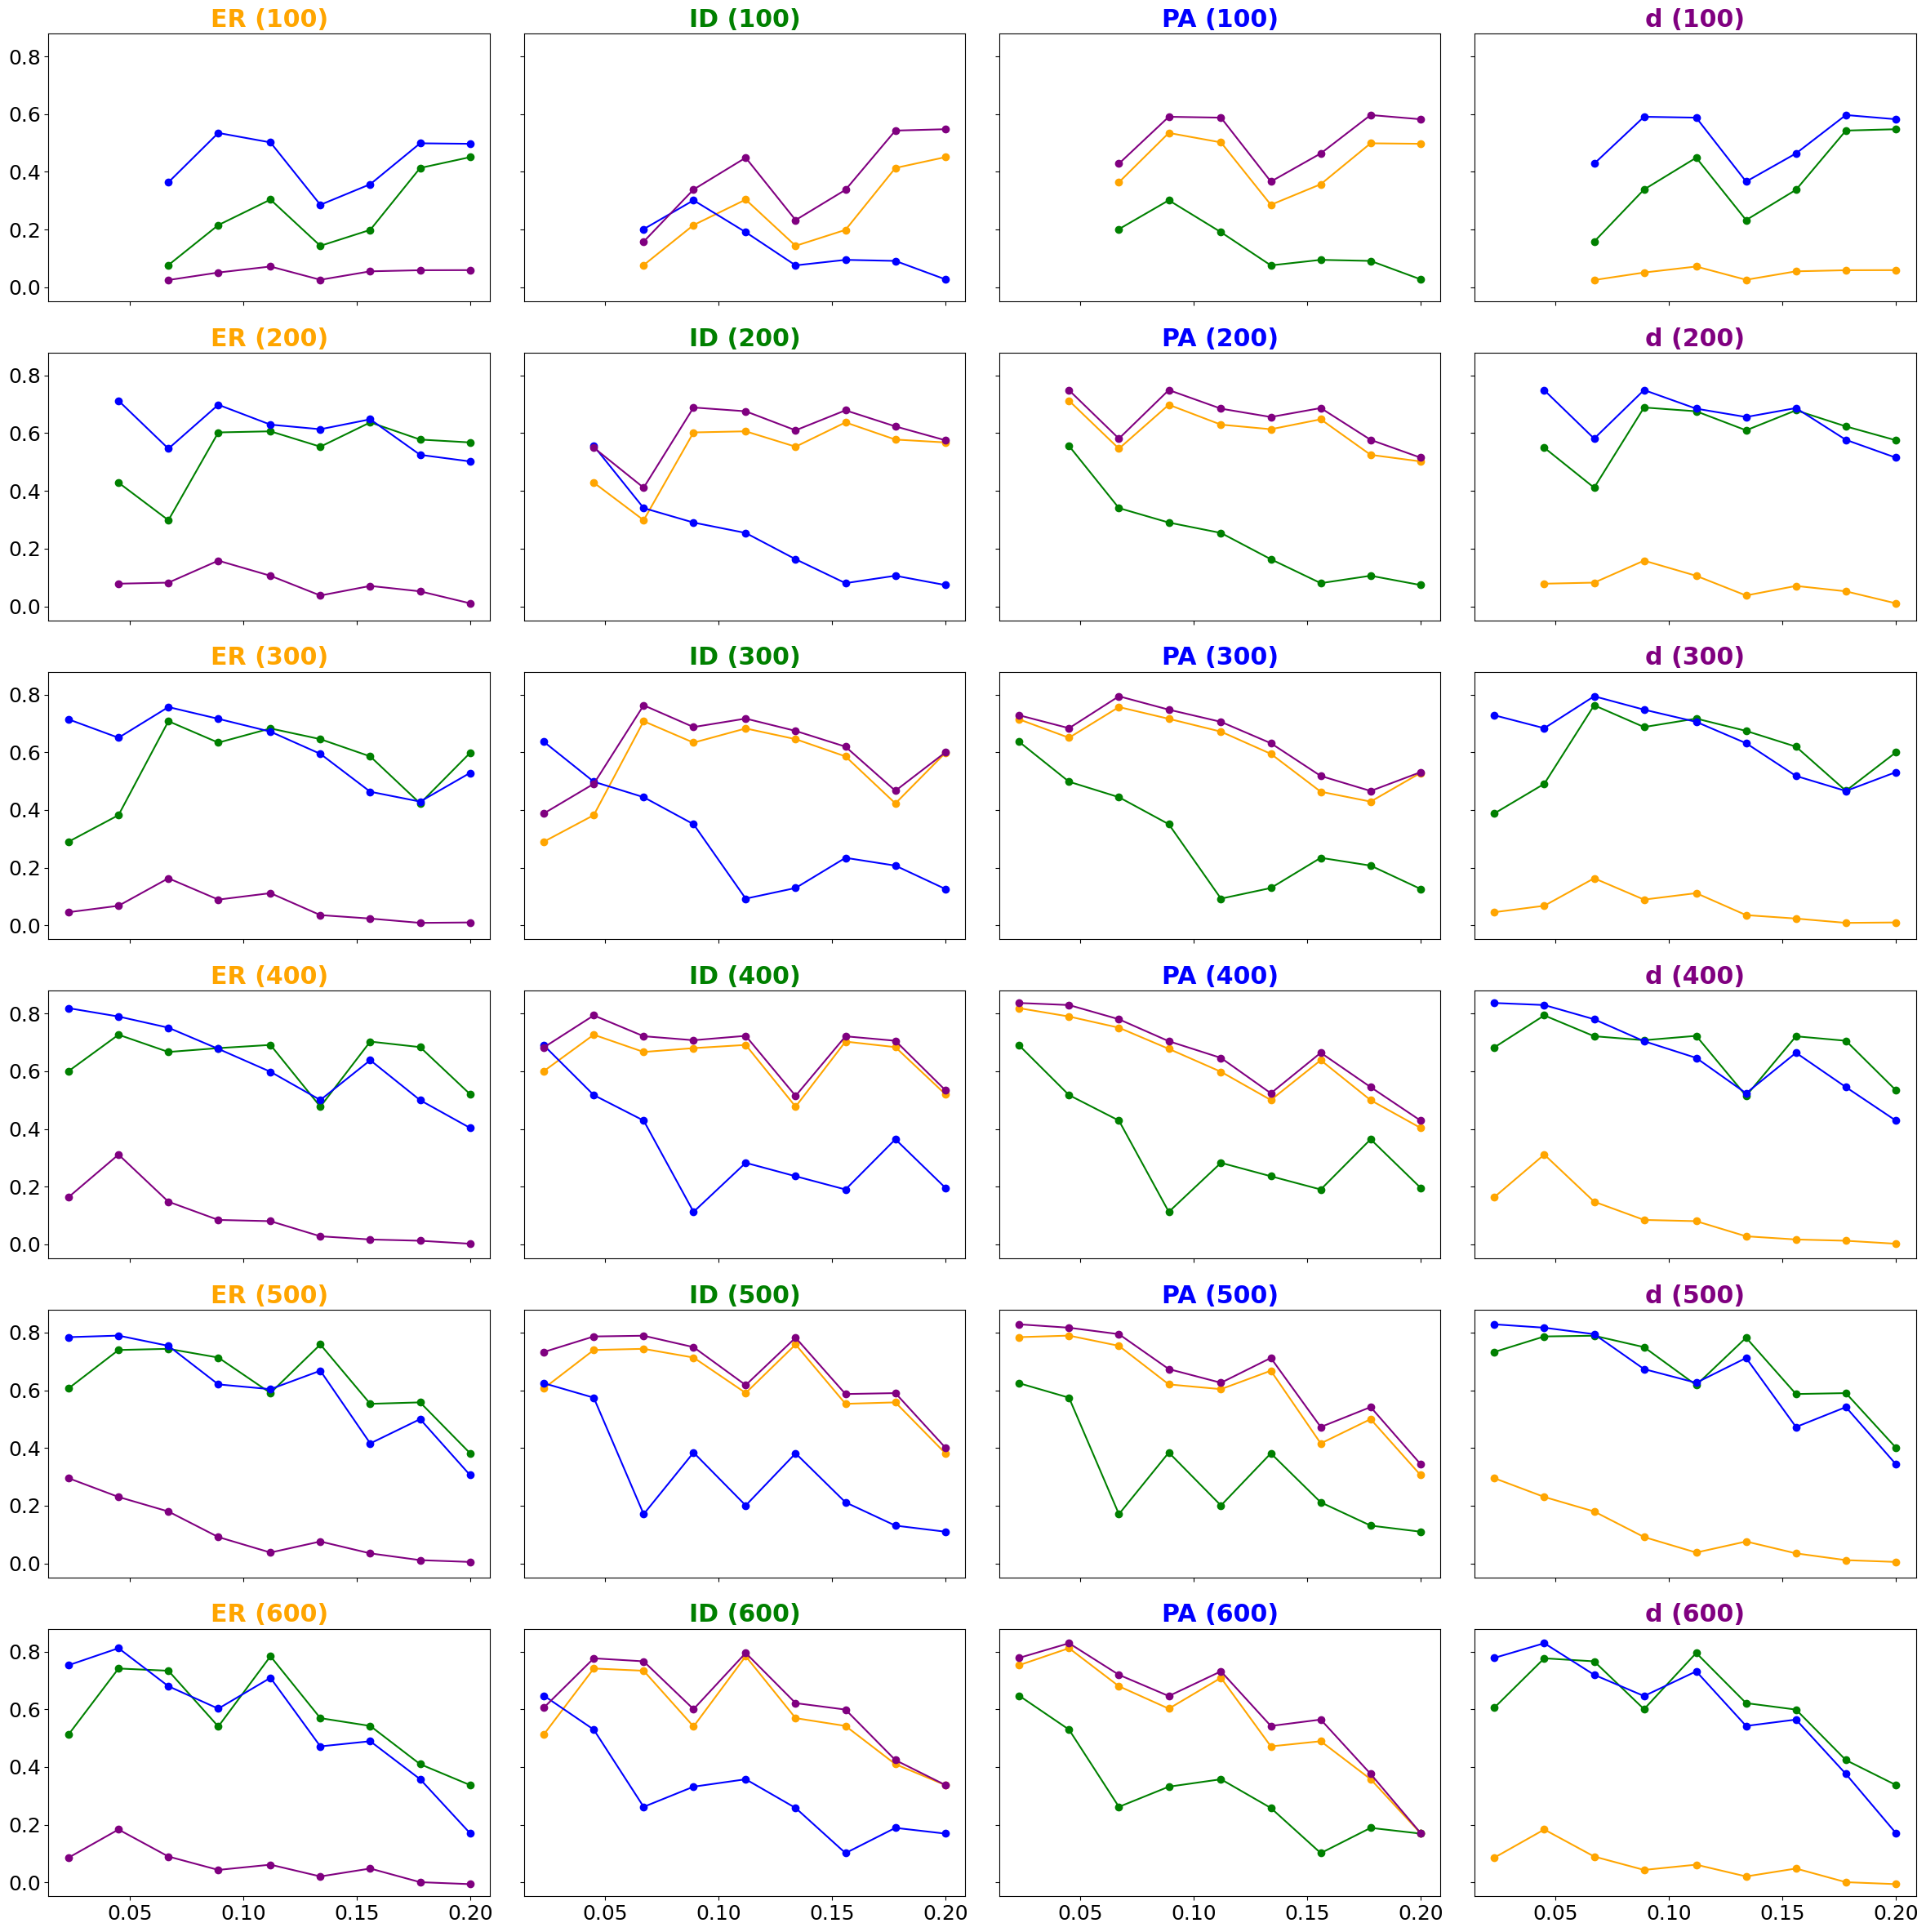

In [204]:
graphmae_netana.plot_families_scores(
    fam_to_color_dict=fam2color_dict
)

plt.tight_layout()
#plt.savefig("illustrations/space_seg/pw_silhouette_graphmae.png")
plt.show()

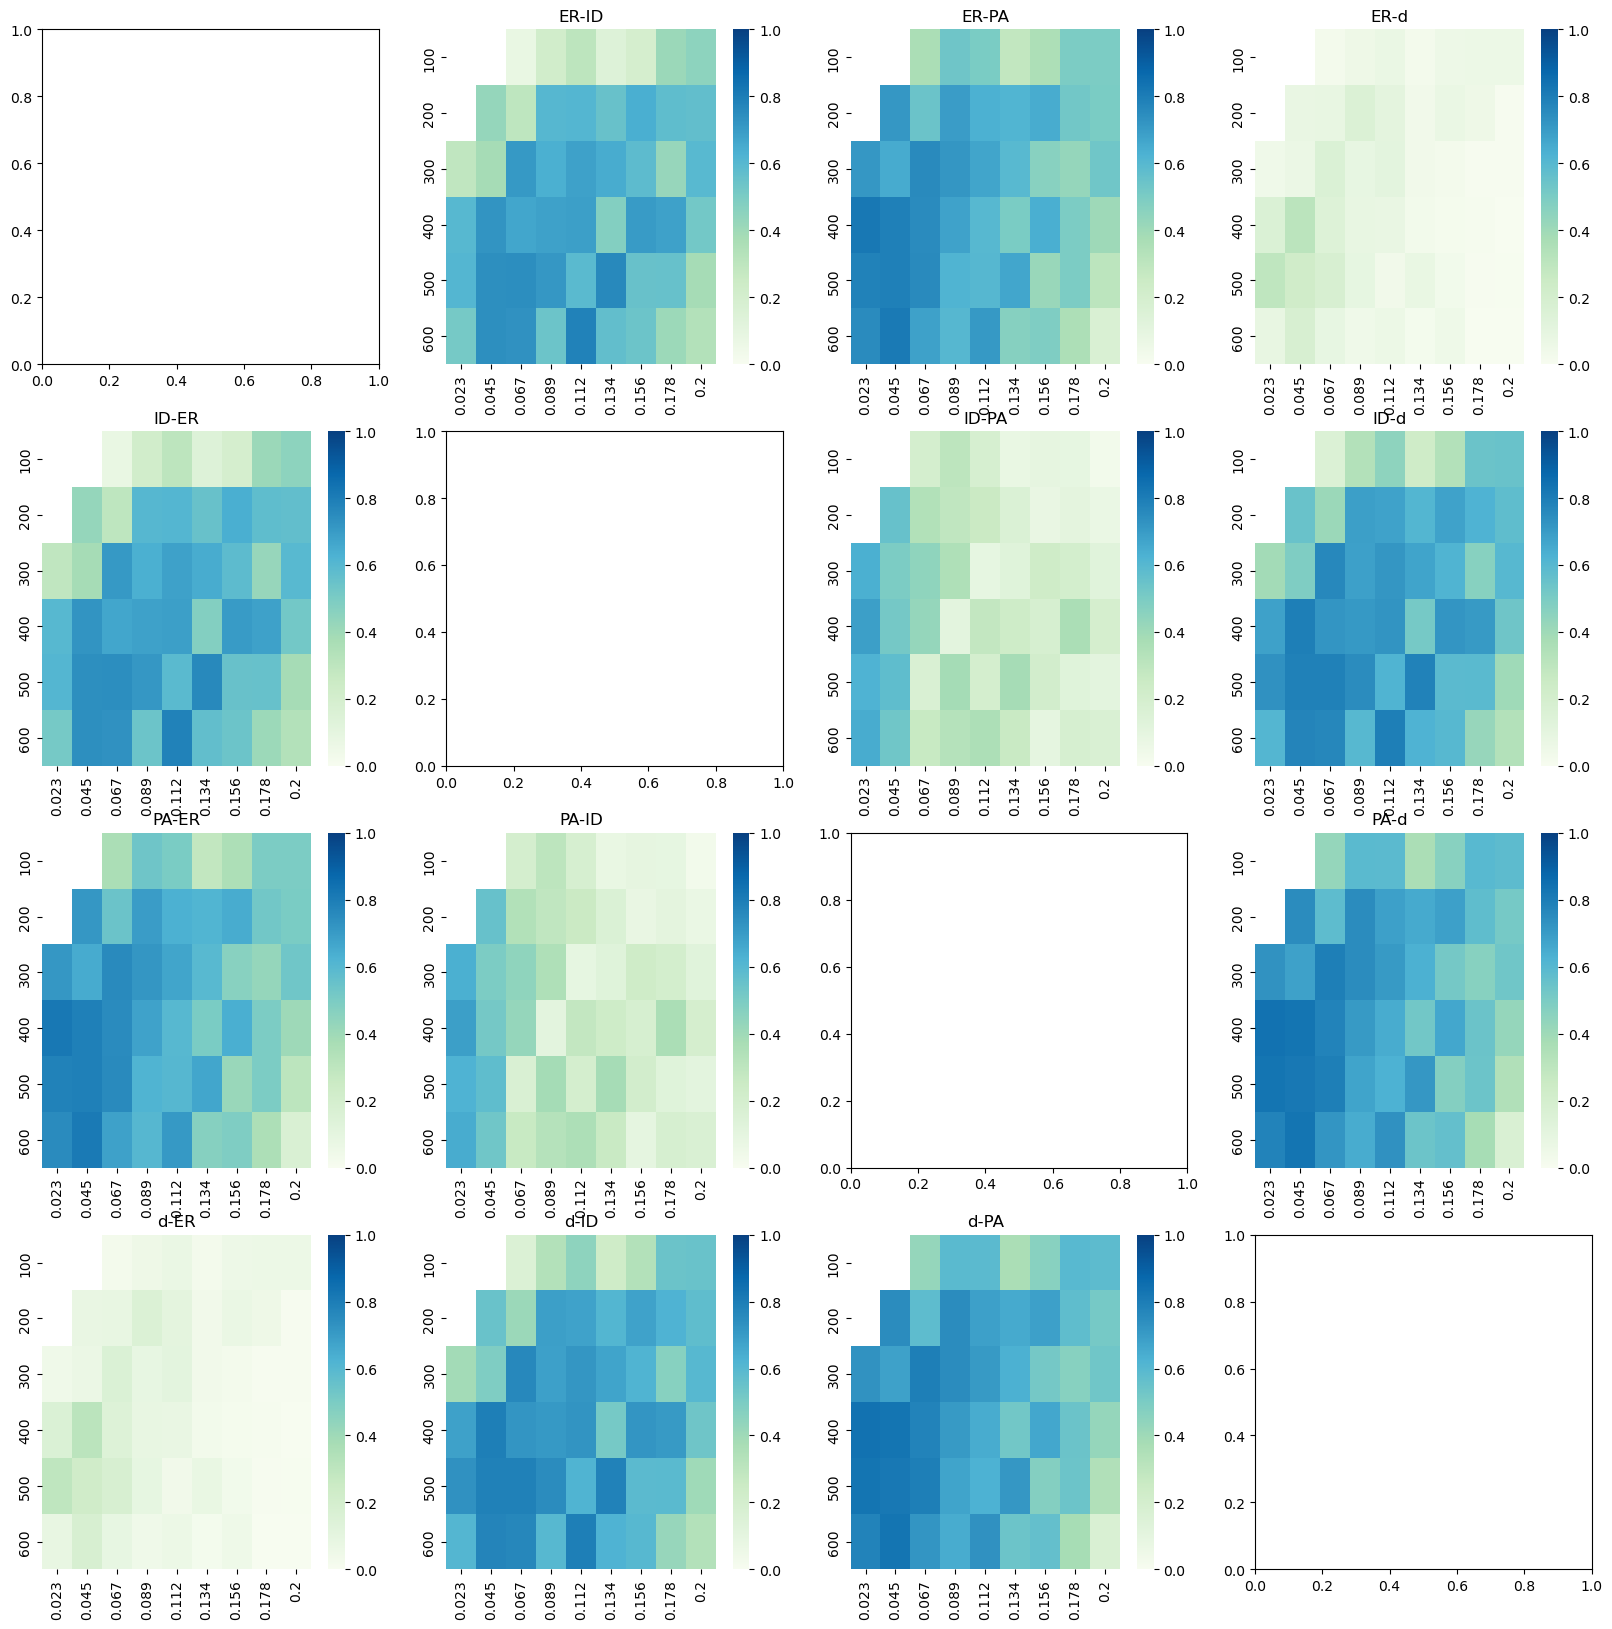

In [34]:
graphmae_netana.plot_pairwise_scores(
)

# 🌬 Untrained models

## PGCL

In [35]:
u_pgcl_emb = load_embedder(
    "DL_module/saved/repro/models/PGCL/0/model_untrained.pth"
)

In [36]:
%%time

u_pgcl_emb_netemb = netgen.make_embedder(
    **{
        "embedding_method": lambda net: embed_deep(net, embedder_method=u_pgcl_emb),
        #"reducer": TSNE(),#"reducer": PCA(n_components=2),#
    }
)

/Users/nmm/Desktop/CMB_CSS_PDM/main_project/./DL_module/Models/model_util.py:151: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  batch = torch.tensor(batch, dtype=int)


CPU times: user 16min 19s, sys: 22.2 s, total: 16min 41s
Wall time: 16min 10s


In [37]:
u_pgcl_netana = u_pgcl_emb_netemb.make_analyzer()

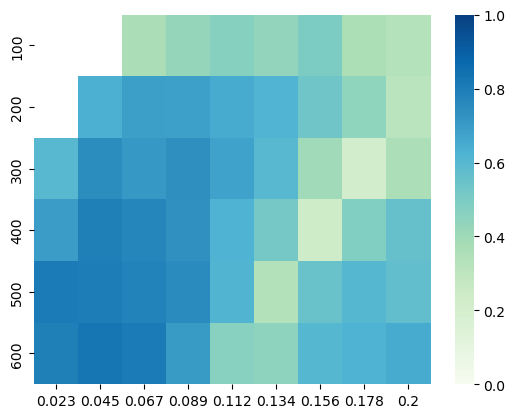

In [38]:
u_pgcl_netana.compute_scores()

u_pgcl_netana.plot_overall_scores()

## GraphMAE

In [39]:
u_graphmae_emb = load_embedder(
    "DL_module/saved/repro/models/GraphMAE/0/model_untrained.pth"
)

In [40]:
%%time

u_graphmae_emb_netemb = netgen.make_embedder(
    **{
        "embedding_method": lambda net: embed_deep(net, embedder_method=u_graphmae_emb),
        #"reducer": TSNE(),#"reducer": PCA(n_components=2),#
    }
)

CPU times: user 15min 59s, sys: 13.7 s, total: 16min 13s
Wall time: 16min 21s


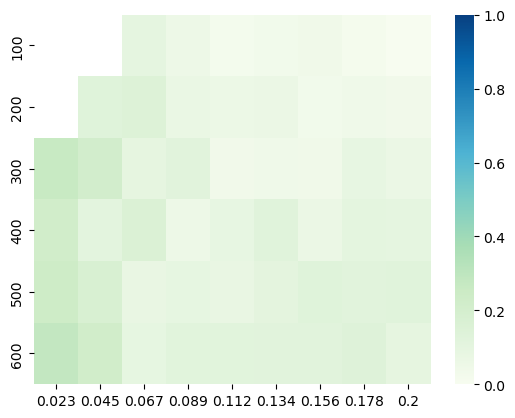

In [41]:
u_graphmae_netana = u_graphmae_emb_netemb.make_analyzer()

u_graphmae_netana.compute_scores()

u_graphmae_netana.plot_overall_scores()

# Comparison ?

In [155]:
netana_ov_scores = netana.get_overall_scores(
    common_p=True
)

netana_ov_scores

0.023     0.045     0.067     0.089     0.112     0.134     0.156  \
100       NaN       NaN  0.059843  0.059302  0.043279  0.038263  0.031661   
200       NaN  0.151500  0.122896  0.081289  0.062998  0.040005  0.046887   
300  0.201252  0.177456  0.107601  0.087221  0.092077  0.101811  0.059319   
400  0.243093  0.171820  0.123478  0.139541  0.090332  0.255228  0.221528   
500  0.274440  0.166472  0.158304  0.104919  0.299572  0.236945  0.363424   
600  0.260056  0.179378  0.177981  0.313073  0.256017  0.394190  0.377822   

        0.178     0.200  
100  0.017833  0.011266  
200  0.059613  0.056824  
300  0.200399  0.219983  
400  0.178851  0.343713  
500  0.375623  0.276934  
600  0.211214 -0.039349

In [156]:
graphmae_netana_ov_scores = graphmae_netana.get_overall_scores(
    common_p=True
)

graphmae_netana_ov_scores

0.023     0.045     0.067     0.089     0.112     0.134     0.156  \
100       NaN       NaN  0.066558  0.130108  0.107113  0.035367  0.055581   
200       NaN  0.283110  0.187942  0.223333  0.180006  0.100248  0.075429   
300  0.250284  0.257061  0.303591  0.219490  0.102026  0.082413  0.127907   
400  0.400247  0.414156  0.288315  0.098640  0.181474  0.131674  0.103515   
500  0.451310  0.402061  0.175236  0.237595  0.119130  0.228613  0.117076   
600  0.332139  0.356434  0.175763  0.187387  0.209453  0.139035  0.074518   

        0.178     0.200  
100  0.071583  0.042886  
200  0.078934  0.042045  
300  0.107370  0.068063  
400  0.180578  0.097219  
500  0.071089  0.051061  
600  0.094923  0.071610

In [157]:
pgcl_netana_ov_scores = pgcl_netana.get_overall_scores(
    common_p=True
)

pgcl_netana_ov_scores

0.023     0.045     0.067     0.089     0.112     0.134     0.156  \
100       NaN       NaN  0.266897  0.401132  0.381673  0.254202  0.392241   
200       NaN  0.613618  0.541839  0.648004  0.630230  0.612169  0.516499   
300  0.499094  0.668354  0.701495  0.729039  0.684712  0.586393  0.391048   
400  0.684589  0.768364  0.757886  0.698752  0.614241  0.471055  0.246362   
500  0.691773  0.801312  0.785800  0.742939  0.602186  0.328178  0.565125   
600  0.738237  0.812000  0.794739  0.683349  0.438347  0.474397  0.614489   

        0.178     0.200  
100  0.325666  0.329559  
200  0.419677  0.309758  
300  0.205558  0.372906  
400  0.492627  0.565897  
500  0.612448  0.571004  
600  0.630561  0.648939

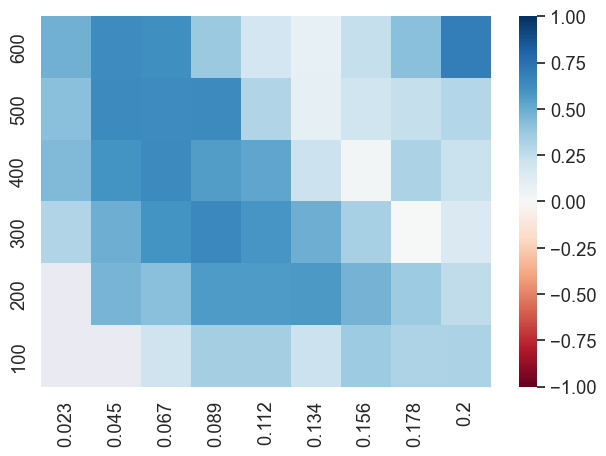

In [159]:
sns.heatmap(
    pgcl_netana_ov_scores[::-1]-netana_ov_scores[::-1]
    , cmap="RdBu"
    , vmin=-1
    , vmax=1
)

plt.tight_layout()
#plt.savefig("illustrations/space_seg/ov_silhouette_pgcl_vs_degs.png")

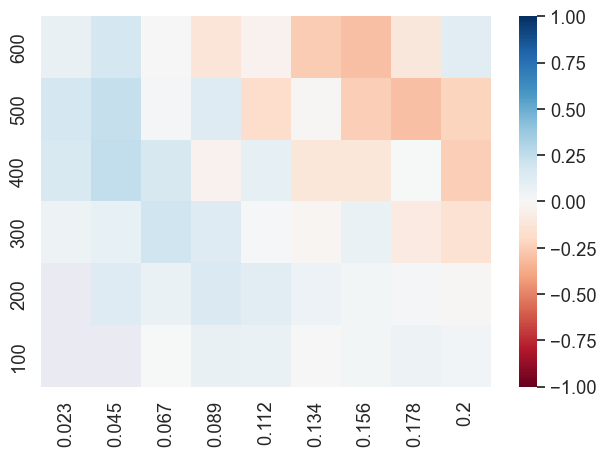

In [160]:
sns.heatmap(
    graphmae_netana_ov_scores[::-1]-netana_ov_scores[::-1]
    , cmap="RdBu"
    , vmin=-1
    , vmax=1
)

plt.tight_layout()
#plt.savefig("illustrations/space_seg/ov_silhouette_graphmae_vs_degs.png")

<AxesSubplot: >

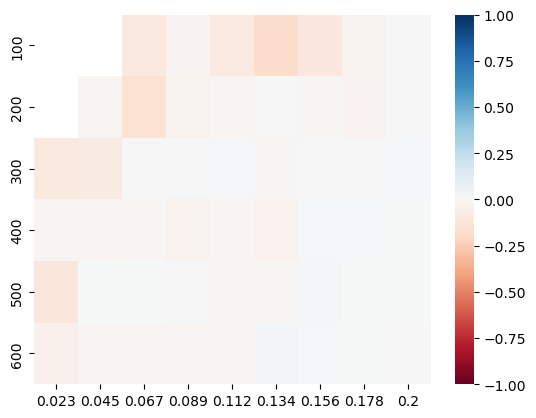

In [54]:
u_pgcl_netana_ov_scores = u_pgcl_netana.get_overall_scores(
    common_p=True
)

sns.heatmap(
    pgcl_netana_ov_scores-u_pgcl_netana_ov_scores
    , cmap="RdBu"
    , vmin=-1
    , vmax=1
)

<AxesSubplot: >

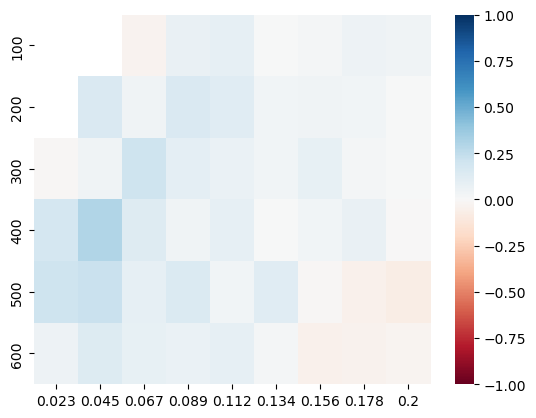

In [55]:
u_graphmae_netana_ov_scores = u_graphmae_netana.get_overall_scores(
    common_p=True
)

sns.heatmap(
    graphmae_netana_ov_scores-u_graphmae_netana_ov_scores
    , cmap="RdBu"
    , vmin=-1
    , vmax=1
)

---

# 🚧 Using Deep Graph Representers

In [9]:
from space_seg.helpers_emb import *

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
embmeth = load_embedder(
    #"DL_module/saved/best_models/GraphMAE_GCNversion_o64/"
    "DL_module/saved/best_models/PGCL_default/"
)

In [11]:
DATA_PATH

'space_seg/data/data_v2/'

In [12]:
deep_netemb = netgen.make_embedder(
    **{
        "embedding_method": lambda net: embed_deep(net, embedder_method=embmeth),
        "reducer": TSNE(),#"reducer": PCA(n_components=2),#
    }
)

/Users/nmm/Desktop/CMB_CSS_PDM/main_project/./DL_module/Models/model_util.py:151: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  batch = torch.tensor(batch, dtype=int)
/Users/nmm/miniforge3/envs/env_gdl/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/nmm/miniforge3/envs/env_gdl/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [13]:
deep_netana = deep_netemb.make_analyzer()

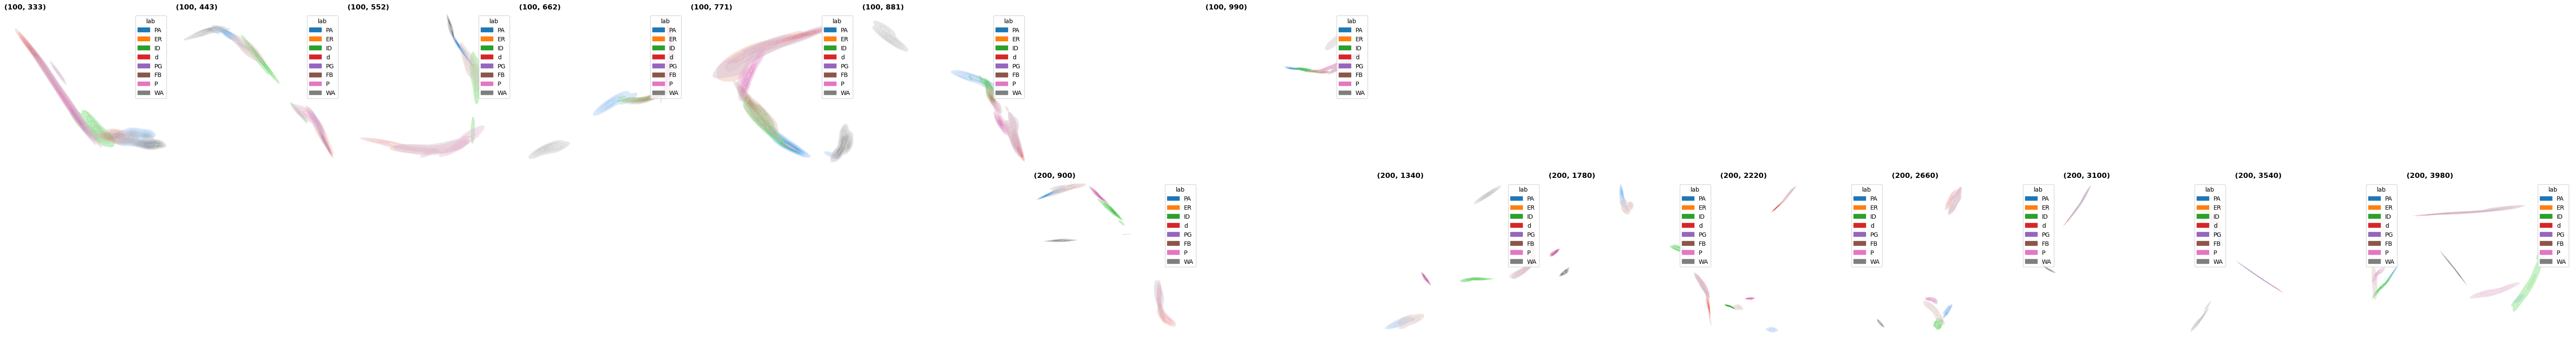

In [14]:
deep_netana.visualise(visualise_ve=visualise_kde)
#plt.savefig("../../PDM/material/TradDegs_KDE_n500_m5000.png", transparent=True)

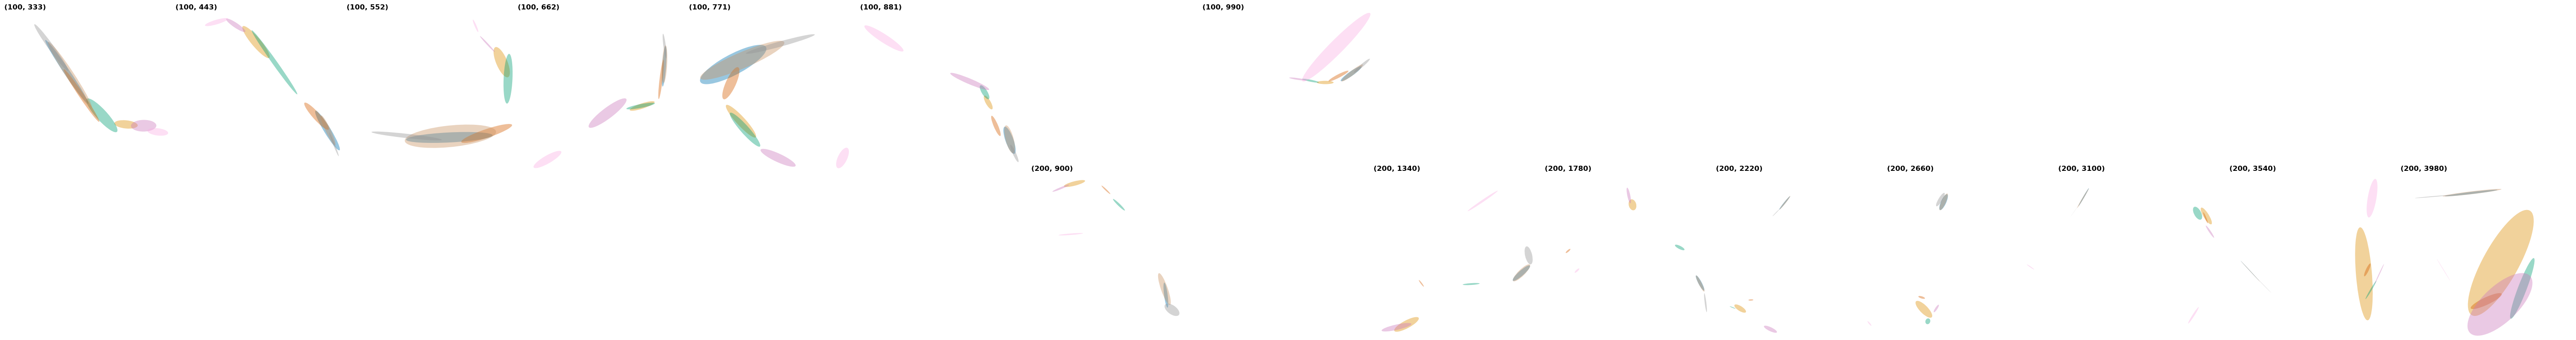

In [15]:
fig = deep_netana.visualise(visualise_ve=visualise_gmm, dark_mode=False, return_fig = True)
fig.subplots_adjust(wspace=0, hspace=0)
#plt.savefig("../../PDM/material/TradDegs_GMMv0.png", transparent=True)

In [16]:
deep_netana.ve_dicts.keys()

dict_keys([(100, 333), (100, 443), (100, 552), (100, 662), (100, 771), (100, 881), (100, 990), (200, 900), (200, 1340), (200, 1780), (200, 2220), (200, 2660), (200, 3100), (200, 3540), (200, 3980)])

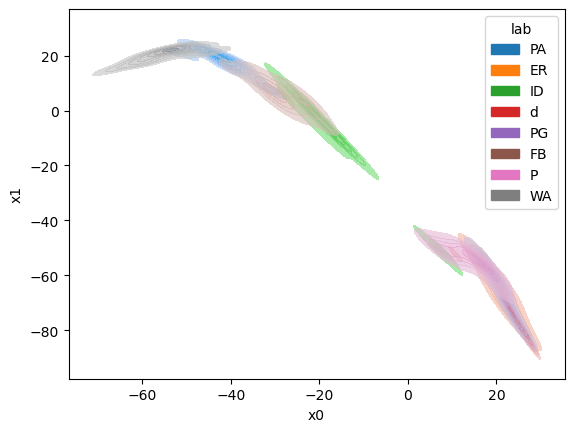

In [17]:
focus_nm = (100, 443)

visualise_kde(
    ve_dict= deep_netana.ve_dicts[(focus_nm[0], focus_nm[1])],
    #ax = ax[0],
    title = (focus_nm[0], focus_nm[1]),
    legend=True,
    alpha=0.6,
)

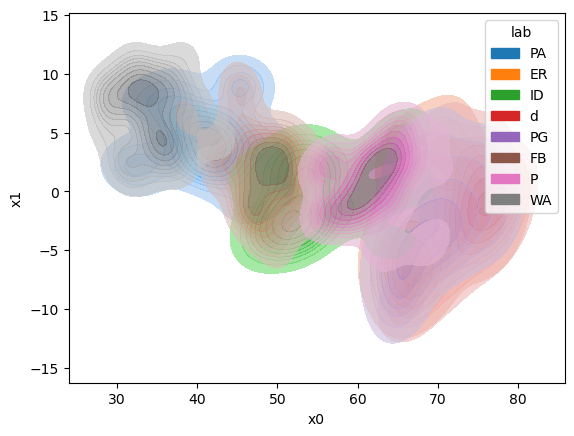

In [31]:
focus_nm = (100, 443)

visualise_kde(
    ve_dict= deep_netana.ve_dicts[(focus_nm[0], focus_nm[1])],
    #ax = ax[0],
    title = (focus_nm[0], focus_nm[1]),
    legend=True,
    alpha=0.6,
)

# 🚧🚧🚧🚧 🧾 Statistics

In [18]:
from space_seg.helpers_stats import *

## ╳ Clustering points

In [19]:
from sklearn import metrics
from sklearn import cluster

from sklearn.metrics import confusion_matrix
from scipy.optimize import linear_sum_assignment

In [20]:
def str_to_scorer(score_type:str):
    if score_type=="acc" or score_type=="accuracy":
        return metrics.accuracy_score
    elif score_type=="f1-micro":
        return lambda y_true, y_pred: metrics.f1_score(y_true, y_pred, average="micro")
    elif score_type=="f1-macro":
        return lambda y_true, y_pred: metrics.f1_score(y_true, y_pred, average="macro")
    elif score_type=="f1":
        return str_to_scorer(score_type="f1-micro")
    
    else:
        raise NotImplementedError("'{}' metric is not implemented.".format(score_type))
        
def cluster_classify_score(
    preds:list,
    labels:list,
    score_type:str='acc',
    plot_viz:bool=False,
):
    def _make_cost_m(cm):
        s = np.max(cm)
        return (- cm + s)
    
    def linear_assignment(cost):
        x,y = linear_sum_assignment(cost)
        return np.array(list(zip(x,y)))
    
    acc=0
    # computing confusion matrix
    cm = confusion_matrix(labels, preds)
    #sns.heatmap(cm), plt.show()
    
    # permutation to maximize the sum on the diagonal
    indexes = linear_assignment(_make_cost_m(cm))
    js = [e[1] for e in sorted(indexes, key=lambda x: x[0])]
    cm2 = cm[:, js]

    if plot_viz:
        sns.heatmap(cm2, annot=True), plt.show()
    
    # compute accuracy
    translate_lab = dict(zip([x[1] for x in indexes]
                             , [x[0] for x in indexes]))
    permut_preds = [translate_lab[p] for p in preds]
    
    scorer = str_to_scorer(score_type)
    score = scorer(labels, permut_preds)
    
    #acc =  np.trace(cm2) / np.sum(cm2)
    
    return score, permut_preds

In [23]:
cluster_method = cluster.KMeans
cluster_score = metrics.silhouette_score

In [ ]:
# deg
for k, v in netana.ve_dicts.items():
    print("==============\n{}".format(k))
    
    curr_embs = v["embs"]
    curr_labels = np.array(v["labels"])
    unique_labels = np.unique(curr_labels)
    nb_labels = len(unique_labels)
    
    numerical_labels = np.array([np.argmax(unique_labels == l) for l in curr_labels])
    
    clustering = cluster_method(nb_labels)
    preds = clustering.fit_predict(curr_embs)
    
    score = cluster_score(curr_embs, numerical_labels)
    dumn_id = metrics.davies_bouldin_score(curr_embs, numerical_labels)
    print("↑ Clustering score : {}".format(score))
    print("↓ Davies-Bouldin : {}".format(dumn_id))
    
    print("------------------\nWith non-native clustering: ")
    
    mi_score = metrics.normalized_mutual_info_score(curr_labels, preds)    
    classify_score = cluster_classify_score(preds, numerical_labels, plot_viz=False)[0]
    print("↑ Mutual Information : {}".format(mi_score))
    print("↑ Classification from clusters : {}".format(classify_score))

NameError: name 'netana' is not defined

In [24]:
# deep
for k, v in deep_netana.ve_dicts.items():
    print("==============\n{}".format(k))
    
    curr_embs = v["embs"]
    curr_labels = np.array(v["labels"])
    unique_labels = np.unique(curr_labels)
    nb_labels = len(unique_labels)
    
    numerical_labels = np.array([np.argmax(unique_labels == l) for l in curr_labels])
    
    clustering = cluster_method(nb_labels)
    preds = clustering.fit_predict(curr_embs)
    
    score = cluster_score(curr_embs, numerical_labels)
    dumn_id = metrics.davies_bouldin_score(curr_embs, numerical_labels)
    print("↑ Clustering score : {}".format(score))
    print("↓ Davies-Bouldin : {}".format(dumn_id))

    print("------------------\nWith non-native clustering: ")
    
    mi_score = metrics.normalized_mutual_info_score(curr_labels, preds)
    classify_score = cluster_classify_score(preds, numerical_labels, plot_viz=False)[0]
    print("↑ Mutual Information : {}".format(mi_score))
    print("↑ Classification from clusters : {}".format(classify_score))

(100, 333)
↑ Clustering score : 0.08559595048427582
↓ Davies-Bouldin : 3.485917421241993
------------------
With non-native clustering: 
↑ Mutual Information : 0.5405237429660795
↑ Classification from clusters : 0.5859375
(100, 443)
↑ Clustering score : 0.1713830679655075
↓ Davies-Bouldin : 10.40212290683219
------------------
With non-native clustering: 
↑ Mutual Information : 0.6049350392939905
↑ Classification from clusters : 0.67578125
(100, 552)
↑ Clustering score : 0.18722066283226013
↓ Davies-Bouldin : 5.7806400575580215
------------------
With non-native clustering: 
↑ Mutual Information : 0.6091536199281747
↑ Classification from clusters : 0.650390625
(100, 662)
↑ Clustering score : 0.17680838704109192
↓ Davies-Bouldin : 5.675097522045182
------------------
With non-native clustering: 
↑ Mutual Information : 0.5851218873560292
↑ Classification from clusters : 0.6015625
(100, 771)
↑ Clustering score : 0.20513202250003815
↓ Davies-Bouldin : 2.387718617613103
------------------
W

### Side-study: silhouette(n clusters)

In [36]:
test_nm = list(netana.ve_dicts.keys())[-1]
n_clusters = np.arange(2, 20, 1)

print(test_nm)

(200, 3980)


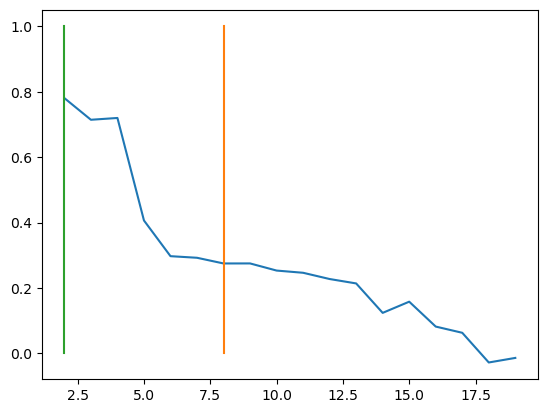

In [35]:
embs = netana.ve_dicts[test_nm]["embs"]
labels = netana.ve_dicts[test_nm]["labels"]

s_scores = []
for n_c in n_clusters:
    clustering = cluster_method(n_c)
    preds = clustering.fit_predict(curr_embs)
    
    s_scores += [cluster_score(embs, preds)]
    
plt.plot(n_clusters, s_scores)
plt.plot([len(set(labels)),len(set(labels))], [0,1])
plt.plot([np.argmax(s_scores)+2,np.argmax(s_scores)+2], [0,1])

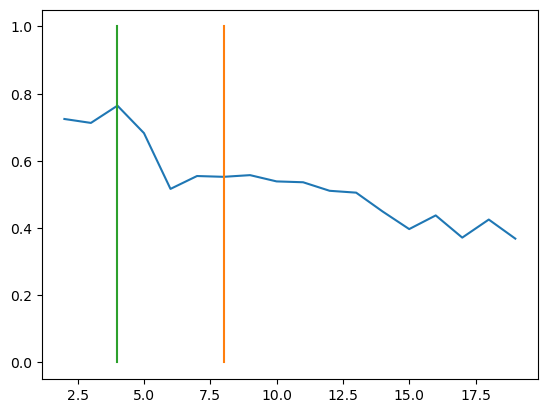

In [37]:
embs = deep_netana.ve_dicts[test_nm]["embs"]
labels = deep_netana.ve_dicts[test_nm]["labels"]

s_scores = []
for n_c in n_clusters:
    clustering = cluster_method(n_c)
    preds = clustering.fit_predict(curr_embs)
    
    s_scores += [cluster_score(embs, preds)]
    
plt.plot(n_clusters, s_scores)
plt.plot([len(set(labels)),len(set(labels))], [0,1])
plt.plot([np.argmax(s_scores)+2,np.argmax(s_scores)+2], [0,1])

## ⭕️ Clustering the probability distributions

💡 Idea:
- Reprenting generators as distributions in the representation space (empirically form the generated networks)
- Clustering directly the distributions 

### Fitted distribution (KDE or 1-GMM) + log-likelihood

In [38]:
from sklearn.neighbors import KernelDensity
from sklearn.mixture import GaussianMixture

In [39]:
curr_k = list(netana.ve_dicts.keys())[-1]

curr_embs = deep_netana.ve_dicts[curr_k]["embs"]
curr_labels = deep_netana.ve_dicts[curr_k]["labels"]

curr_fam = "ER"

In [40]:
kde_fam = KernelDensity()
gm_fam = GaussianMixture()

In [41]:
curr_fam_embs = np.array([e for e,f in zip(curr_embs, curr_labels) if f == curr_fam])

In [42]:
kde_fam.fit(curr_fam_embs)

KernelDensity()

In [43]:
gm_fam.fit(curr_fam_embs)

GaussianMixture()

In [44]:
kde_fam.get_params()

{'algorithm': 'auto',
 'atol': 0,
 'bandwidth': 1.0,
 'breadth_first': True,
 'kernel': 'gaussian',
 'leaf_size': 40,
 'metric': 'euclidean',
 'metric_params': None,
 'rtol': 0}

In [45]:
kde_fam.score(curr_fam_embs)

-263.05640341831497

In [46]:
other_fam = "d"
other_fam_embs = np.array([e for e,f in zip(curr_embs, curr_labels) if f == other_fam])

kde_fam.score(other_fam_embs)

-280.9846389429524

In [47]:
other_fam = "PA"
other_fam_embs = np.array([e for e,f in zip(curr_embs, curr_labels) if f == other_fam])

kde_fam.score(other_fam_embs)

-15983.129606699591

In [48]:
# deg
for k, v in netana.ve_dicts.items():
    print("==============\n{}".format(k))
    
    curr_embs = v["embs"]
    curr_labels = np.array(v["labels"])
    unique_labels = np.unique(curr_labels)
    
    scores_kde = []
    scores_gm = []
    for curr_fam in unique_labels:
        
        curr_fam_embs = np.array([e for e,f in zip(curr_embs, curr_labels) if f == curr_fam])
        kde_fam = KernelDensity().fit(curr_fam_embs)
        gm_fam = GaussianMixture().fit(curr_fam_embs)
        
        for other_fam in unique_labels:
            other_fam_embs = np.array([e for e,f in zip(curr_embs, curr_labels) if f == other_fam])
            
            if other_fam != curr_fam:
                scores_kde += [kde_fam.score(other_fam_embs)]
                scores_gm += [gm_fam.score(other_fam_embs)]
            else:
                pass
                #scores_kde += [-kde_fam.score(other_fam_embs)]
                #scores_gm += [-gm_fam.score(other_fam_embs)]
                
                
    print("↓ KDE LL : {} | GM LL : {} ".format(np.mean(scores_kde), np.mean(scores_gm)))

(100, 333)
↓ KDE LL : -1562.0995625789658 | GM LL : -17.093028115433036 
(100, 443)
↓ KDE LL : -1987.6463156731857 | GM LL : -17.50393176107928 
(100, 552)
↓ KDE LL : -2557.402565061409 | GM LL : -19.291102257962287 
(100, 662)
↓ KDE LL : -2990.749308842344 | GM LL : -23.530279832332372 
(100, 771)
↓ KDE LL : -3253.447966808872 | GM LL : -20.398615410204094 
(100, 881)
↓ KDE LL : -2900.636653105323 | GM LL : -18.191613409053694 
(100, 990)
↓ KDE LL : -2266.1893781049425 | GM LL : -16.281810509859778 
(200, 900)
↓ KDE LL : -19797.598043885915 | GM LL : -284.5316415544807 
(200, 1340)
↓ KDE LL : -228396.78253672752 | GM LL : -2104.717242997203 
(200, 1780)
↓ KDE LL : -30860.060499504652 | GM LL : -273.11210521129294 
(200, 2220)
↓ KDE LL : -139739.6280415424 | GM LL : -903.1202271640394 
(200, 2660)
↓ KDE LL : -157454.45386057423 | GM LL : -865.2230760475852 
(200, 3100)
↓ KDE LL : -99567.30526212695 | GM LL : -501.88311897067473 
(200, 3540)
↓ KDE LL : -23463.537180887062 | GM LL : -131

In [49]:
# deep
for k, v in deep_netana.ve_dicts.items():
    print("==============\n{}".format(k))
    
    curr_embs = v["embs"]
    curr_labels = np.array(v["labels"])
    unique_labels = np.unique(curr_labels)
    
    scores_kde = []
    scores_gm = []
    for curr_fam in unique_labels:
        
        curr_fam_embs = np.array([e for e,f in zip(curr_embs, curr_labels) if f == curr_fam])
        kde_fam = KernelDensity().fit(curr_fam_embs)
        gm_fam = GaussianMixture().fit(curr_fam_embs)
        
        for other_fam in unique_labels:
            other_fam_embs = np.array([e for e,f in zip(curr_embs, curr_labels) if f == other_fam])
            
            if other_fam != curr_fam:
                scores_kde += [kde_fam.score(other_fam_embs)]
                scores_gm += [gm_fam.score(other_fam_embs)]
            else:
                pass
                #scores_kde += [-kde_fam.score(other_fam_embs)]
                #scores_gm += [-gm_fam.score(other_fam_embs)]
                
                
    print("↓ KDE LL : {} | GM LL : {} ".format(np.mean(scores_kde), np.mean(scores_gm)))

(100, 333)
↓ KDE LL : -2828.3577559152027 | GM LL : -21.06352480647349 
(100, 443)
↓ KDE LL : -6941.950951912711 | GM LL : -25.276293893144008 
(100, 552)
↓ KDE LL : -3411.991904027664 | GM LL : -26.729106323210548 
(100, 662)
↓ KDE LL : -6288.0868395054995 | GM LL : -26.210492897806823 
(100, 771)
↓ KDE LL : -6070.17951273627 | GM LL : -30.605050324847372 
(100, 881)
↓ KDE LL : -5112.510843121222 | GM LL : -22.571651942606845 
(100, 990)
↓ KDE LL : -7610.823424618882 | GM LL : -39.923642561820024 
(200, 900)
↓ KDE LL : -105228.22957378409 | GM LL : -1660.0341891398207 
(200, 1340)
↓ KDE LL : -16002.77843140661 | GM LL : -244.1476322809685 
(200, 1780)
↓ KDE LL : -21788.083398730603 | GM LL : -319.59949997254233 
(200, 2220)
↓ KDE LL : -145730.93438734574 | GM LL : -1424.8225857799953 
(200, 2660)
↓ KDE LL : -92240.8808737356 | GM LL : -829.914508808038 
(200, 3100)
↓ KDE LL : -134713.4814212509 | GM LL : -1266.9600918975127 
(200, 3540)
↓ KDE LL : -253144.19631590796 | GM LL : -2232.8

### KL-divergence

> **Note**
> Here, the higher the KL-divergence, the better the segregation !!

In [51]:
from space_seg.helpers_stats import KLdivergence

In [52]:
# deg 

for k, v in netana.ve_dicts.items():
    print("==============\n{}".format(k))
    
    curr_embs = v["embs"]
    curr_labels = np.array(v["labels"])
    unique_labels = np.unique(curr_labels)
    
    scores = []
    for curr_fam in unique_labels:
        
        curr_fam_embs = np.array([e for e,f in zip(curr_embs, curr_labels) if f == curr_fam])
        
        fam_scores = []
        for other_fam in unique_labels:
            if other_fam != curr_fam:
                other_fam_embs = np.array([e for e,f in zip(curr_embs, curr_labels) if f == other_fam])
                fam_scores += [KLdivergence(curr_fam_embs, other_fam_embs)]
            else:
                pass#scores += [-kde_fam.score(other_fam_embs)]
                
        scores += [fam_scores]
                
    print("↑\t>"+"|".join([" {} : {:.5g} ".format(f,mean_kl) for f, mean_kl in zip(unique_labels, np.mean(scores, axis=1))]))
    print(np.mean(scores))
    
deg_scores = scores

(100, 333)
↑	> ER : 2.8684 | FB : 3.8708 | ID : 2.5948 | P : 4.2209 | PA : 4.4476 | PG : 2.4723 | WA : 5.6845 | d : 3.3535 
3.689112195409087
(100, 443)
↑	> ER : 2.951 | FB : 3.7 | ID : 3.1247 | P : 3.9301 | PA : 4.0198 | PG : 3.5118 | WA : 6.1063 | d : 4.4753 
3.9773839498951356
(100, 552)
↑	> ER : 3.4961 | FB : 3.1594 | ID : 3.5345 | P : 3.8029 | PA : 4.3051 | PG : 2.9355 | WA : 6.7935 | d : 3.9777 
4.0005753686715835
(100, 662)
↑	> ER : 3.6895 | FB : 2.8671 | ID : 3.4722 | P : 4.4315 | PA : 4.2612 | PG : 3.5079 | WA : 6.8479 | d : 4.384 
4.182674755886206
(100, 771)
↑	> ER : 4.1137 | FB : 3.2882 | ID : 3.2871 | P : 4.7946 | PA : 4.0541 | PG : 3.5757 | WA : 6.3343 | d : 4.3795 
4.228389170558041
(100, 881)
↑	> ER : 3.6735 | FB : 3.2947 | ID : 3.9384 | P : 4.591 | PA : 3.5912 | PG : 3.2895 | WA : 5.2762 | d : 4.4431 
4.01218283340358
(100, 990)
↑	> ER : 3.1382 | FB : 3.1366 | ID : 3.7137 | P : 4.6717 | PA : 4.1656 | PG : 3.2425 | WA : 6.1039 | d : 3.8237 
3.999484684117316
(200, 900)


In [53]:
# deep 

for k, v in deep_netana.ve_dicts.items():
    print("==============\n{}".format(k))
    
    curr_embs = v["embs"]
    curr_labels = np.array(v["labels"])
    unique_labels = np.unique(curr_labels)
    
    scores = []
    for curr_fam in unique_labels:
        
        curr_fam_embs = np.array([e for e,f in zip(curr_embs, curr_labels) if f == curr_fam])
        
        fam_scores = []
        for other_fam in unique_labels:
            if other_fam != curr_fam:
                other_fam_embs = np.array([e for e,f in zip(curr_embs, curr_labels) if f == other_fam])
                fam_scores += [KLdivergence(curr_fam_embs, other_fam_embs)]
            else:
                pass#scores += [-kde_fam.score(other_fam_embs)]
                
        scores += [fam_scores]
                
    print("↑\t>"+"|".join([" {} : {:.5g} ".format(f,mean_kl) for f, mean_kl in zip(unique_labels, np.mean(scores, axis=1))]))
    print(np.mean(scores))
    
deep_scores = scores

(100, 333)
↑	> ER : 3.4629 | FB : 4.687 | ID : 4.0544 | P : 4.4136 | PA : 4.7948 | PG : 3.1692 | WA : 6.2726 | d : 4.6417 
4.437027792367443
(100, 443)
↑	> ER : 3.431 | FB : 4.7282 | ID : 4.4701 | P : 5.1284 | PA : 5.4345 | PG : 3.6102 | WA : 6.5541 | d : 4.9998 
4.794540055269942
(100, 552)
↑	> ER : 3.598 | FB : 3.9633 | ID : 3.113 | P : 4.2916 | PA : 5.323 | PG : 3.6432 | WA : 7.6337 | d : 4.7629 
4.5410829023450825
(100, 662)
↑	> ER : 3.8524 | FB : 3.7805 | ID : 4.4385 | P : 5.0859 | PA : 5.0511 | PG : 3.5895 | WA : 6.9528 | d : 5.3067 
4.757191417170428
(100, 771)
↑	> ER : 3.4751 | FB : 3.8203 | ID : 4.087 | P : 5.3852 | PA : 4.9958 | PG : 3.9869 | WA : 8.664 | d : 4.769 
4.897916829246588
(100, 881)
↑	> ER : 3.7648 | FB : 4.0368 | ID : 4.3502 | P : 5.2991 | PA : 4.1951 | PG : 3.944 | WA : 6.6086 | d : 5.0905 
4.661141962908703
(100, 990)
↑	> ER : 3.9527 | FB : 3.8724 | ID : 4.7048 | P : 4.9047 | PA : 5.2259 | PG : 3.9503 | WA : 8.2205 | d : 4.5281 
4.919928112502118
(200, 900)
↑	>

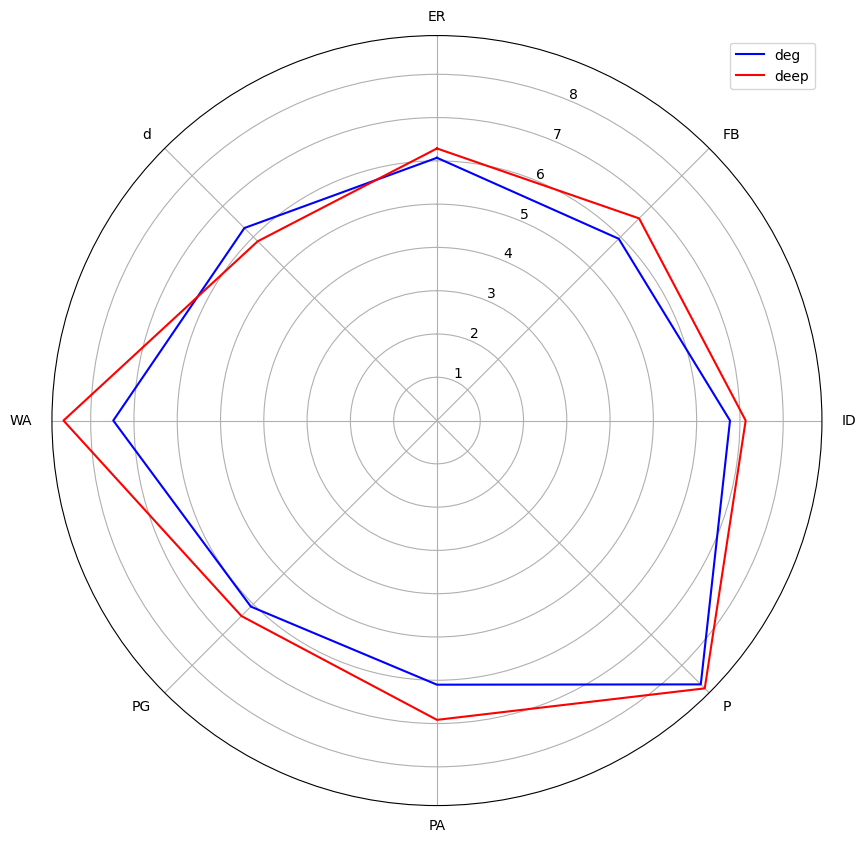

In [54]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='polar')

# Number of variables we're plotting.
num_vars = len(unique_labels)
labels = unique_labels

# Split the circle into even parts and save the angles
# so we know where to put each axis.
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# retrieve values to plot
values_deg = list(np.mean(deg_scores, axis=1))
values_deep = list(np.mean(deep_scores, axis=1))
# The plot is a circle, so we need to "complete the loop"
# and append the start value to the end.
values_deg += values_deg[:1]
values_deep += values_deep[:1]
angles += angles[:1]


# Draw the outline of our data.
ax.plot(angles
        , values_deg
        , label="deg"
        , color='blue'
       )
ax.plot(angles
        , values_deep
        , label="deep"
        , color='red'
       )



# Fill it in.
#ax.fill(angles, values_deep, color='red', alpha=0.25)
#ax.fill(angles, values_deg, color='blue', alpha=0.25)

# Fix axis to go in the right order and start at 12 o'clock.
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
# Draw axis lines for each angle and label.
ax.set_thetagrids(np.degrees(angles[:-1]), labels)


# Go through labels and adjust alignment based on where
# it is in the circle.
for label, angle in zip(ax.get_xticklabels(), angles):
    if angle in (0, np.pi):
        label.set_horizontalalignment('center')
    elif 0 < angle < np.pi:
        label.set_horizontalalignment('left')
    else:
        label.set_horizontalalignment('right')

# Set position of y-labels (0-100) to be in the middle
# of the first two axes.
ax.set_rlabel_position(180 / num_vars)

plt.legend()
plt.show()

In [43]:
n_emp = 1500
e_emp = 4280

print(" < k > : {} ".format(2*e_emp/n_emp)) # sum of all nodes' degs / number of nodes
print("density : {} ".format(e_emp/max_possible_edges(n_emp)))

 < k > : 5.706666666666667 
density : 0.0038069824327329332 


# 👁 Everything Everywhere All at Once

In [55]:
deep_netana.ve_dicts.keys()

dict_keys([(100, 333), (100, 443), (100, 552), (100, 662), (100, 771), (100, 881), (100, 990), (200, 900), (200, 1340), (200, 1780), (200, 2220), (200, 2660), (200, 3100), (200, 3540), (200, 3980)])

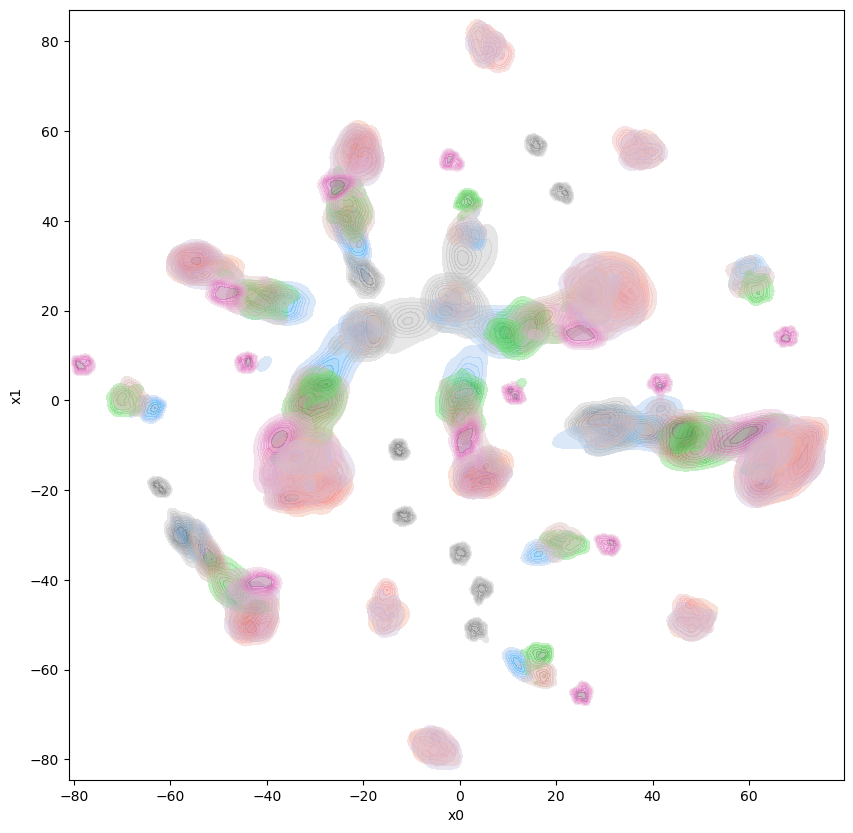

In [56]:
fig, ax = plt.subplots(figsize=(10,10))

for k, v in deep_netana.ve_dicts.items():
    
    curr_dict = v.copy()
    curr_dict["labels"] = ['{}_{}'.format(k,lab) for lab in curr_dict["labels"]]
    
    visualise_kde(
        ve_dict=curr_dict,
        ax = ax,
        title = None,
        legend=False,
        alpha=0.4,
    )

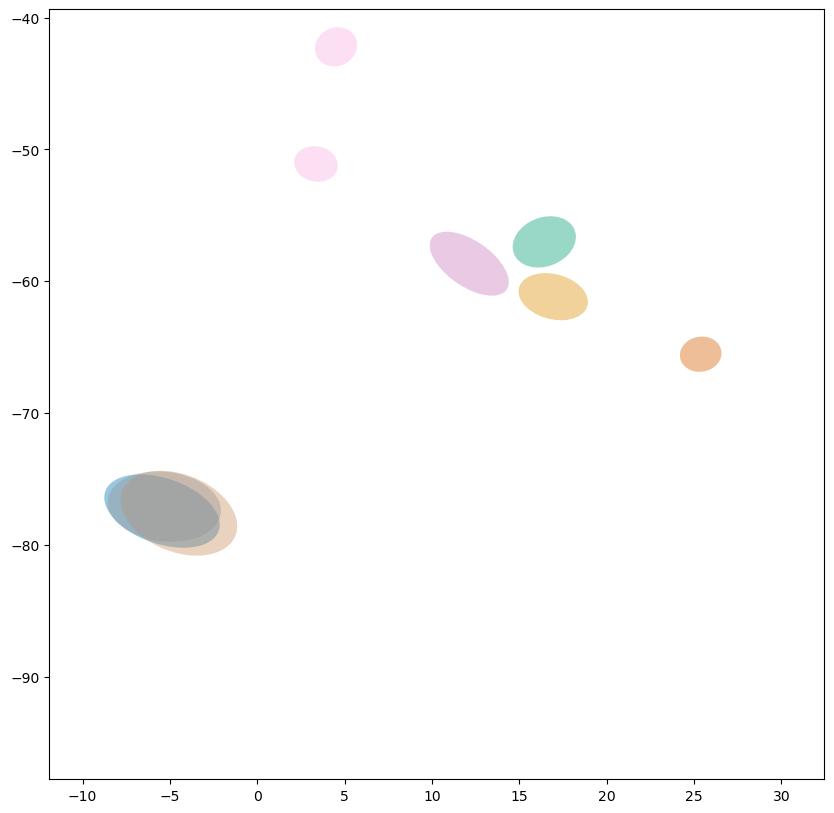

In [57]:
fig, ax = plt.subplots(figsize=(10,10))

for k, v in deep_netana.ve_dicts.items():
    
    curr_dict = v.copy()
    curr_dict["labels"] = ['{}_{}'.format(k,lab) for lab in curr_dict["labels"]]
    
    visualise_gmm(
        ve_dict=curr_dict,
        ax = ax,
    )

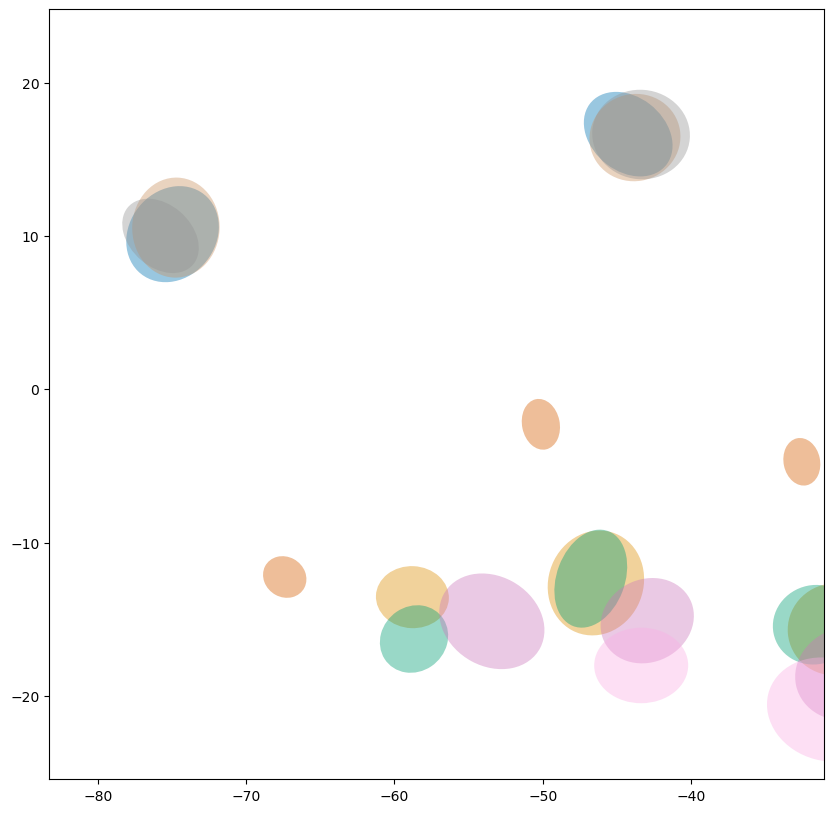

In [58]:
fig, ax = plt.subplots(figsize=(10,10))

for k, v in netana.ve_dicts.items():
    
    curr_dict = v.copy()
    curr_dict["labels"] = ['{}_{}'.format(k,lab) for lab in curr_dict["labels"]]
    
    visualise_gmm(
        ve_dict=curr_dict,
        ax = ax,
    )

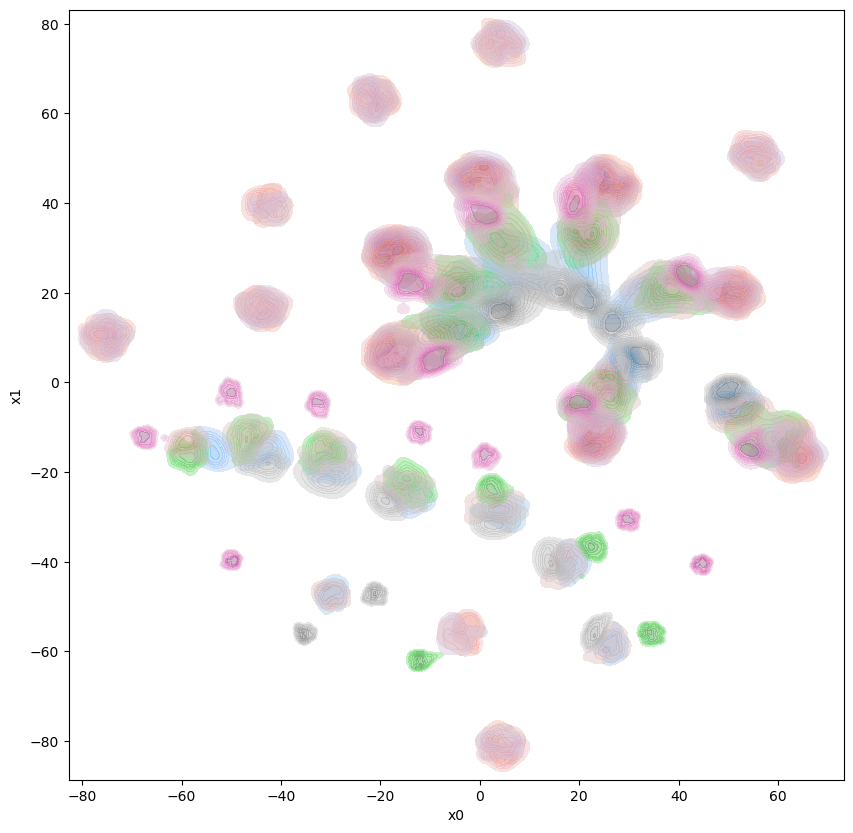

In [59]:
fig, ax = plt.subplots(figsize=(10,10))

for k, v in netana.ve_dicts.items():
    
    curr_dict = v.copy()
    curr_dict["labels"] = ['{}_{}'.format(k,lab) for lab in curr_dict["labels"]]
    
    visualise_kde(
        ve_dict=curr_dict,
        ax = ax,
        title = None,
        legend=False,
        alpha=0.4,
    )

# Adding a graph to the representation space

In [83]:
from synthetic.net import load_net

In [100]:
words_net = load_net("data/data_2013/obs/words.gml", directed=False)
words_net_pred2013 = load_net("data/data_2013/synth/words-synth.edges", directed=False)

In [85]:
deep_netemb.embedder(words_net)

array([ 0.00818782, -0.02190135,  0.0192186 ,  0.02264906,  0.00783197,
       -0.00401608,  0.05286753, -0.04155434, -0.06926156, -0.01091375,
       -0.07910489,  0.08153556, -0.02420563, -0.09289867,  0.05302689,
        0.03506151,  0.0113985 , -0.00612916,  0.05609081,  0.05235431,
       -0.01391548, -0.04774407, -0.01550668, -0.00710429,  0.01154399,
        0.02990455, -0.05566167, -0.01558483,  0.02251163,  0.0272945 ,
        0.04266712, -0.07433044], dtype=float32)

In [101]:
words_emb = deep_netemb.reducer.transform(np.array([deep_netemb.embedder(words_net)]))[0]
words_emb_pred_2013 = deep_netemb.reducer.transform(np.array([deep_netemb.embedder(words_net_pred2013)]))[0]

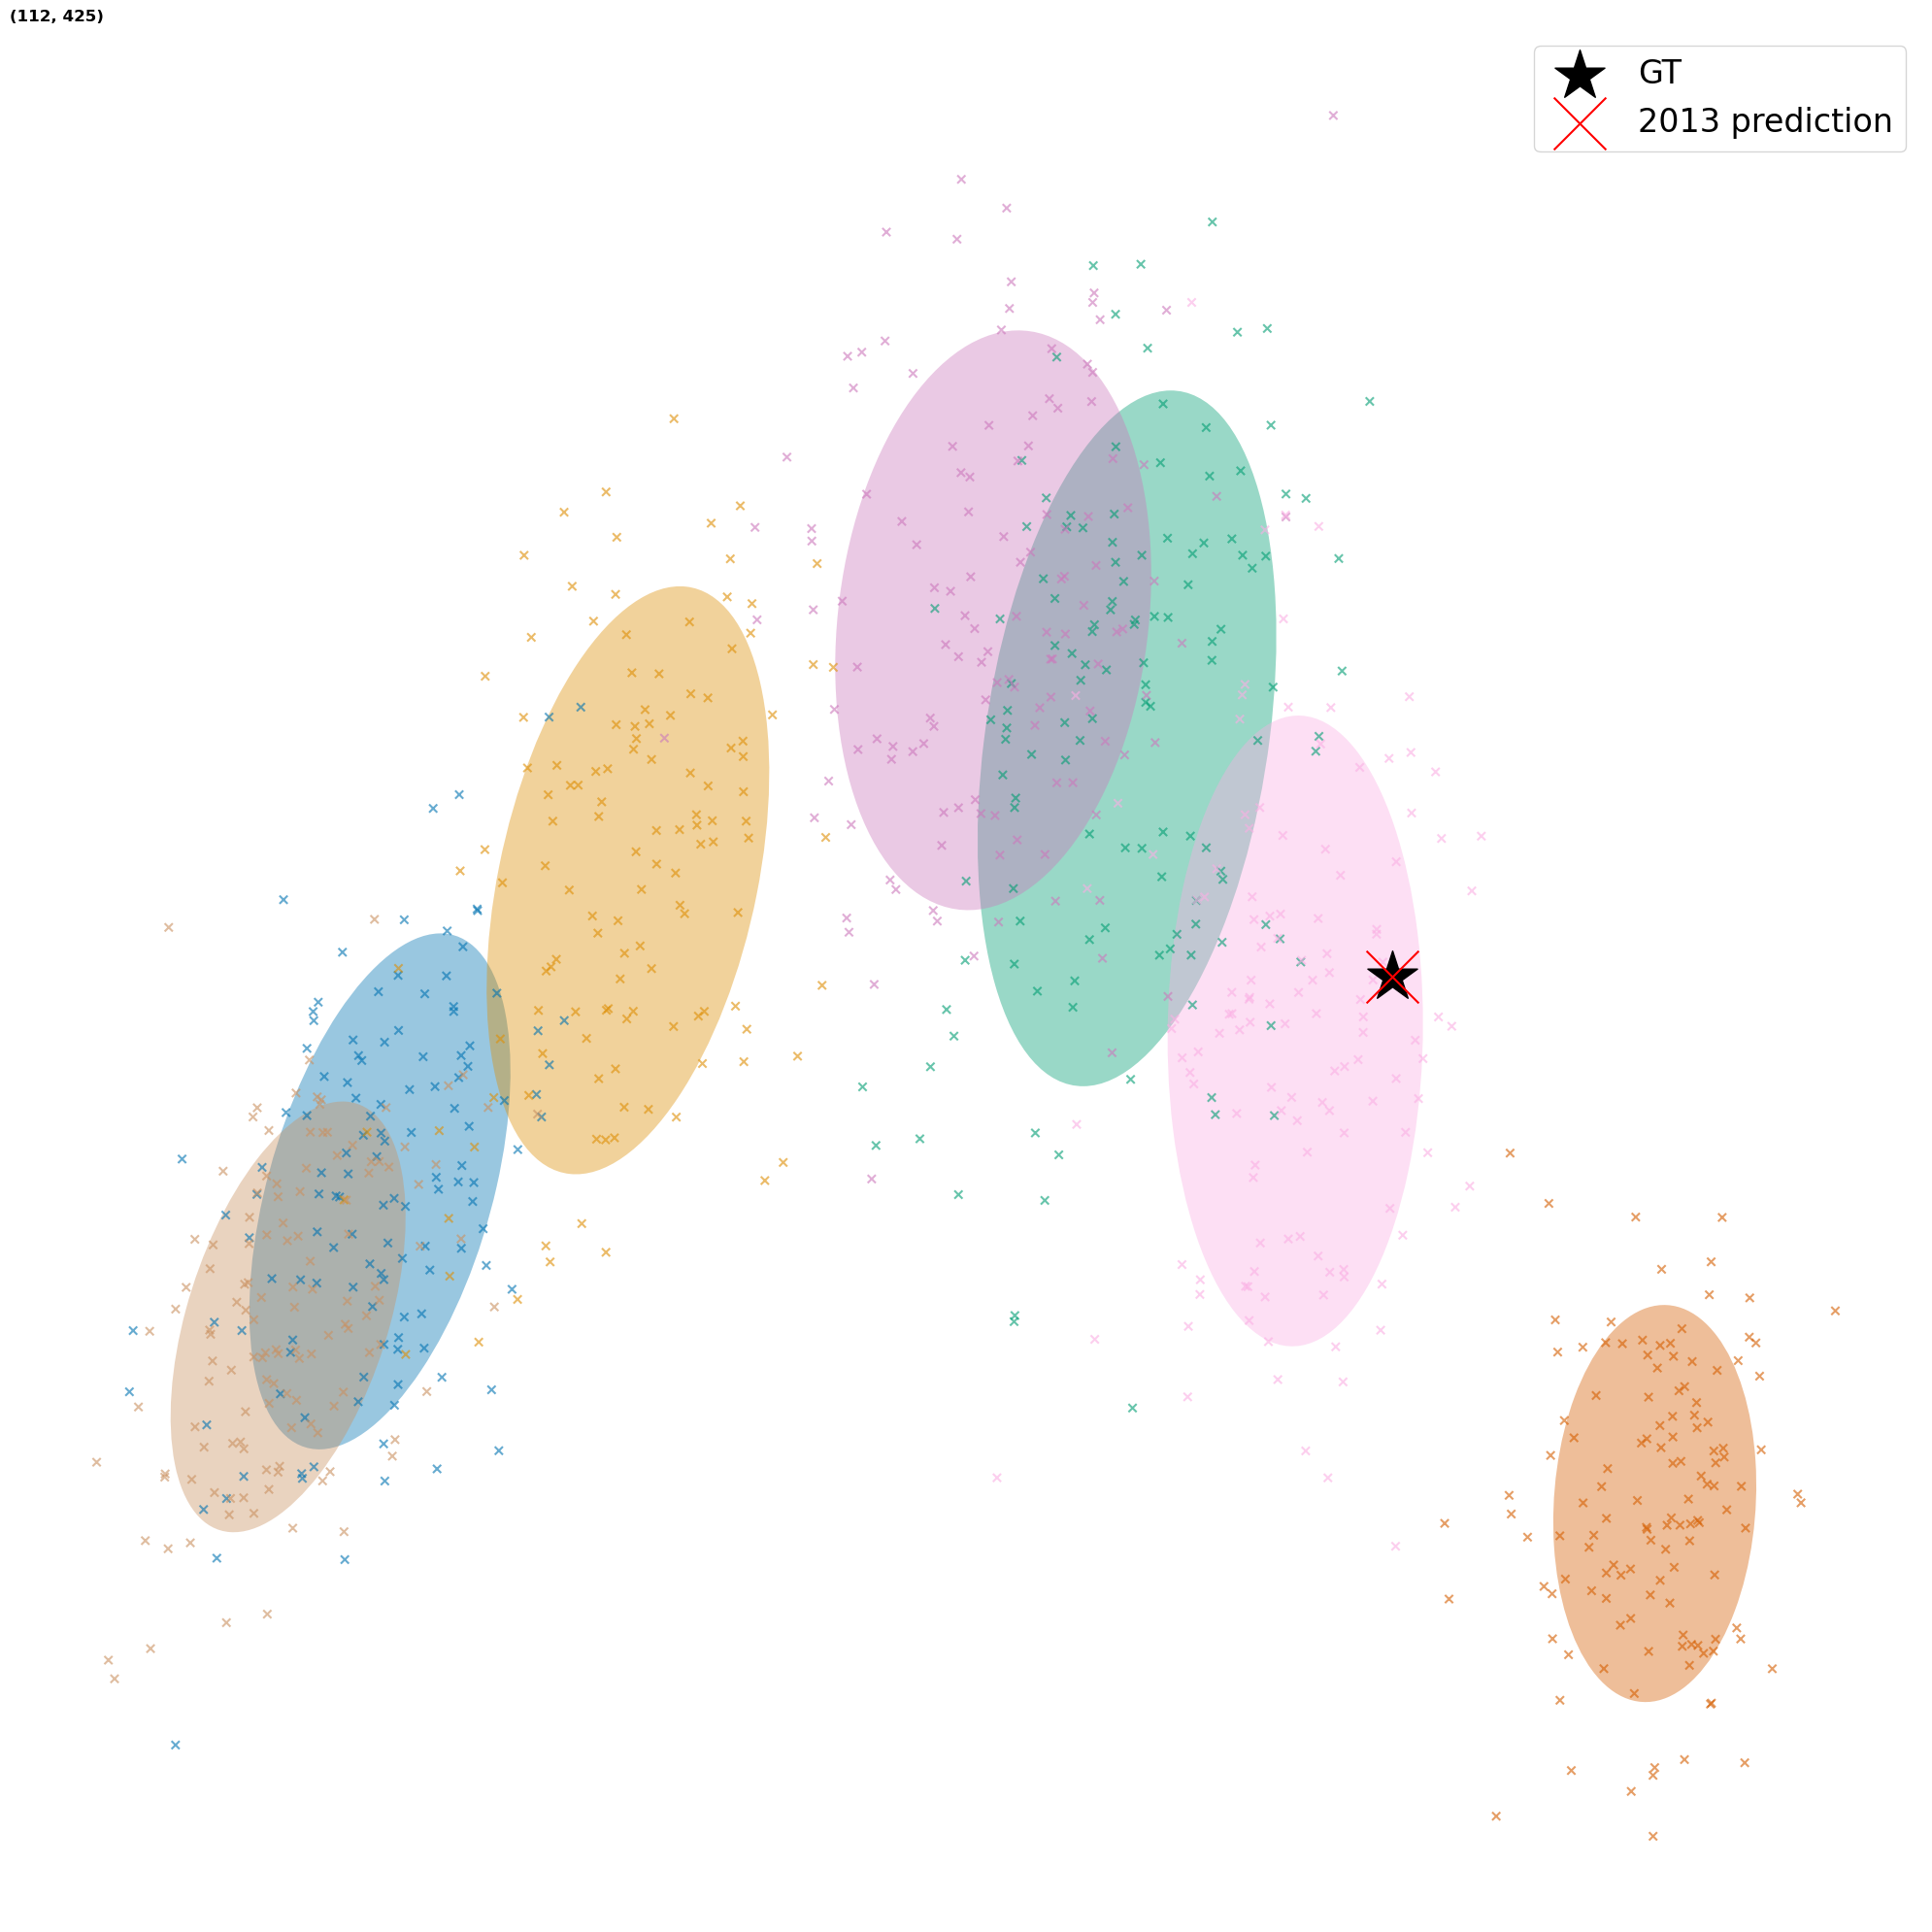

In [110]:
deep_netana.visualise(visualise_ve=visualise_gmm, dark_mode=False, return_fig = True)
plt.scatter(words_emb[0], words_emb[1]
            , c='k'
            , marker='*'
            , s=1500
            , label = "GT"
           )

plt.scatter(words_emb[0], words_emb[1]
            , c='r'
            , marker='x'
            , s=1500
            , label = "2013 prediction"
           )

plt.legend(fontsize=24)

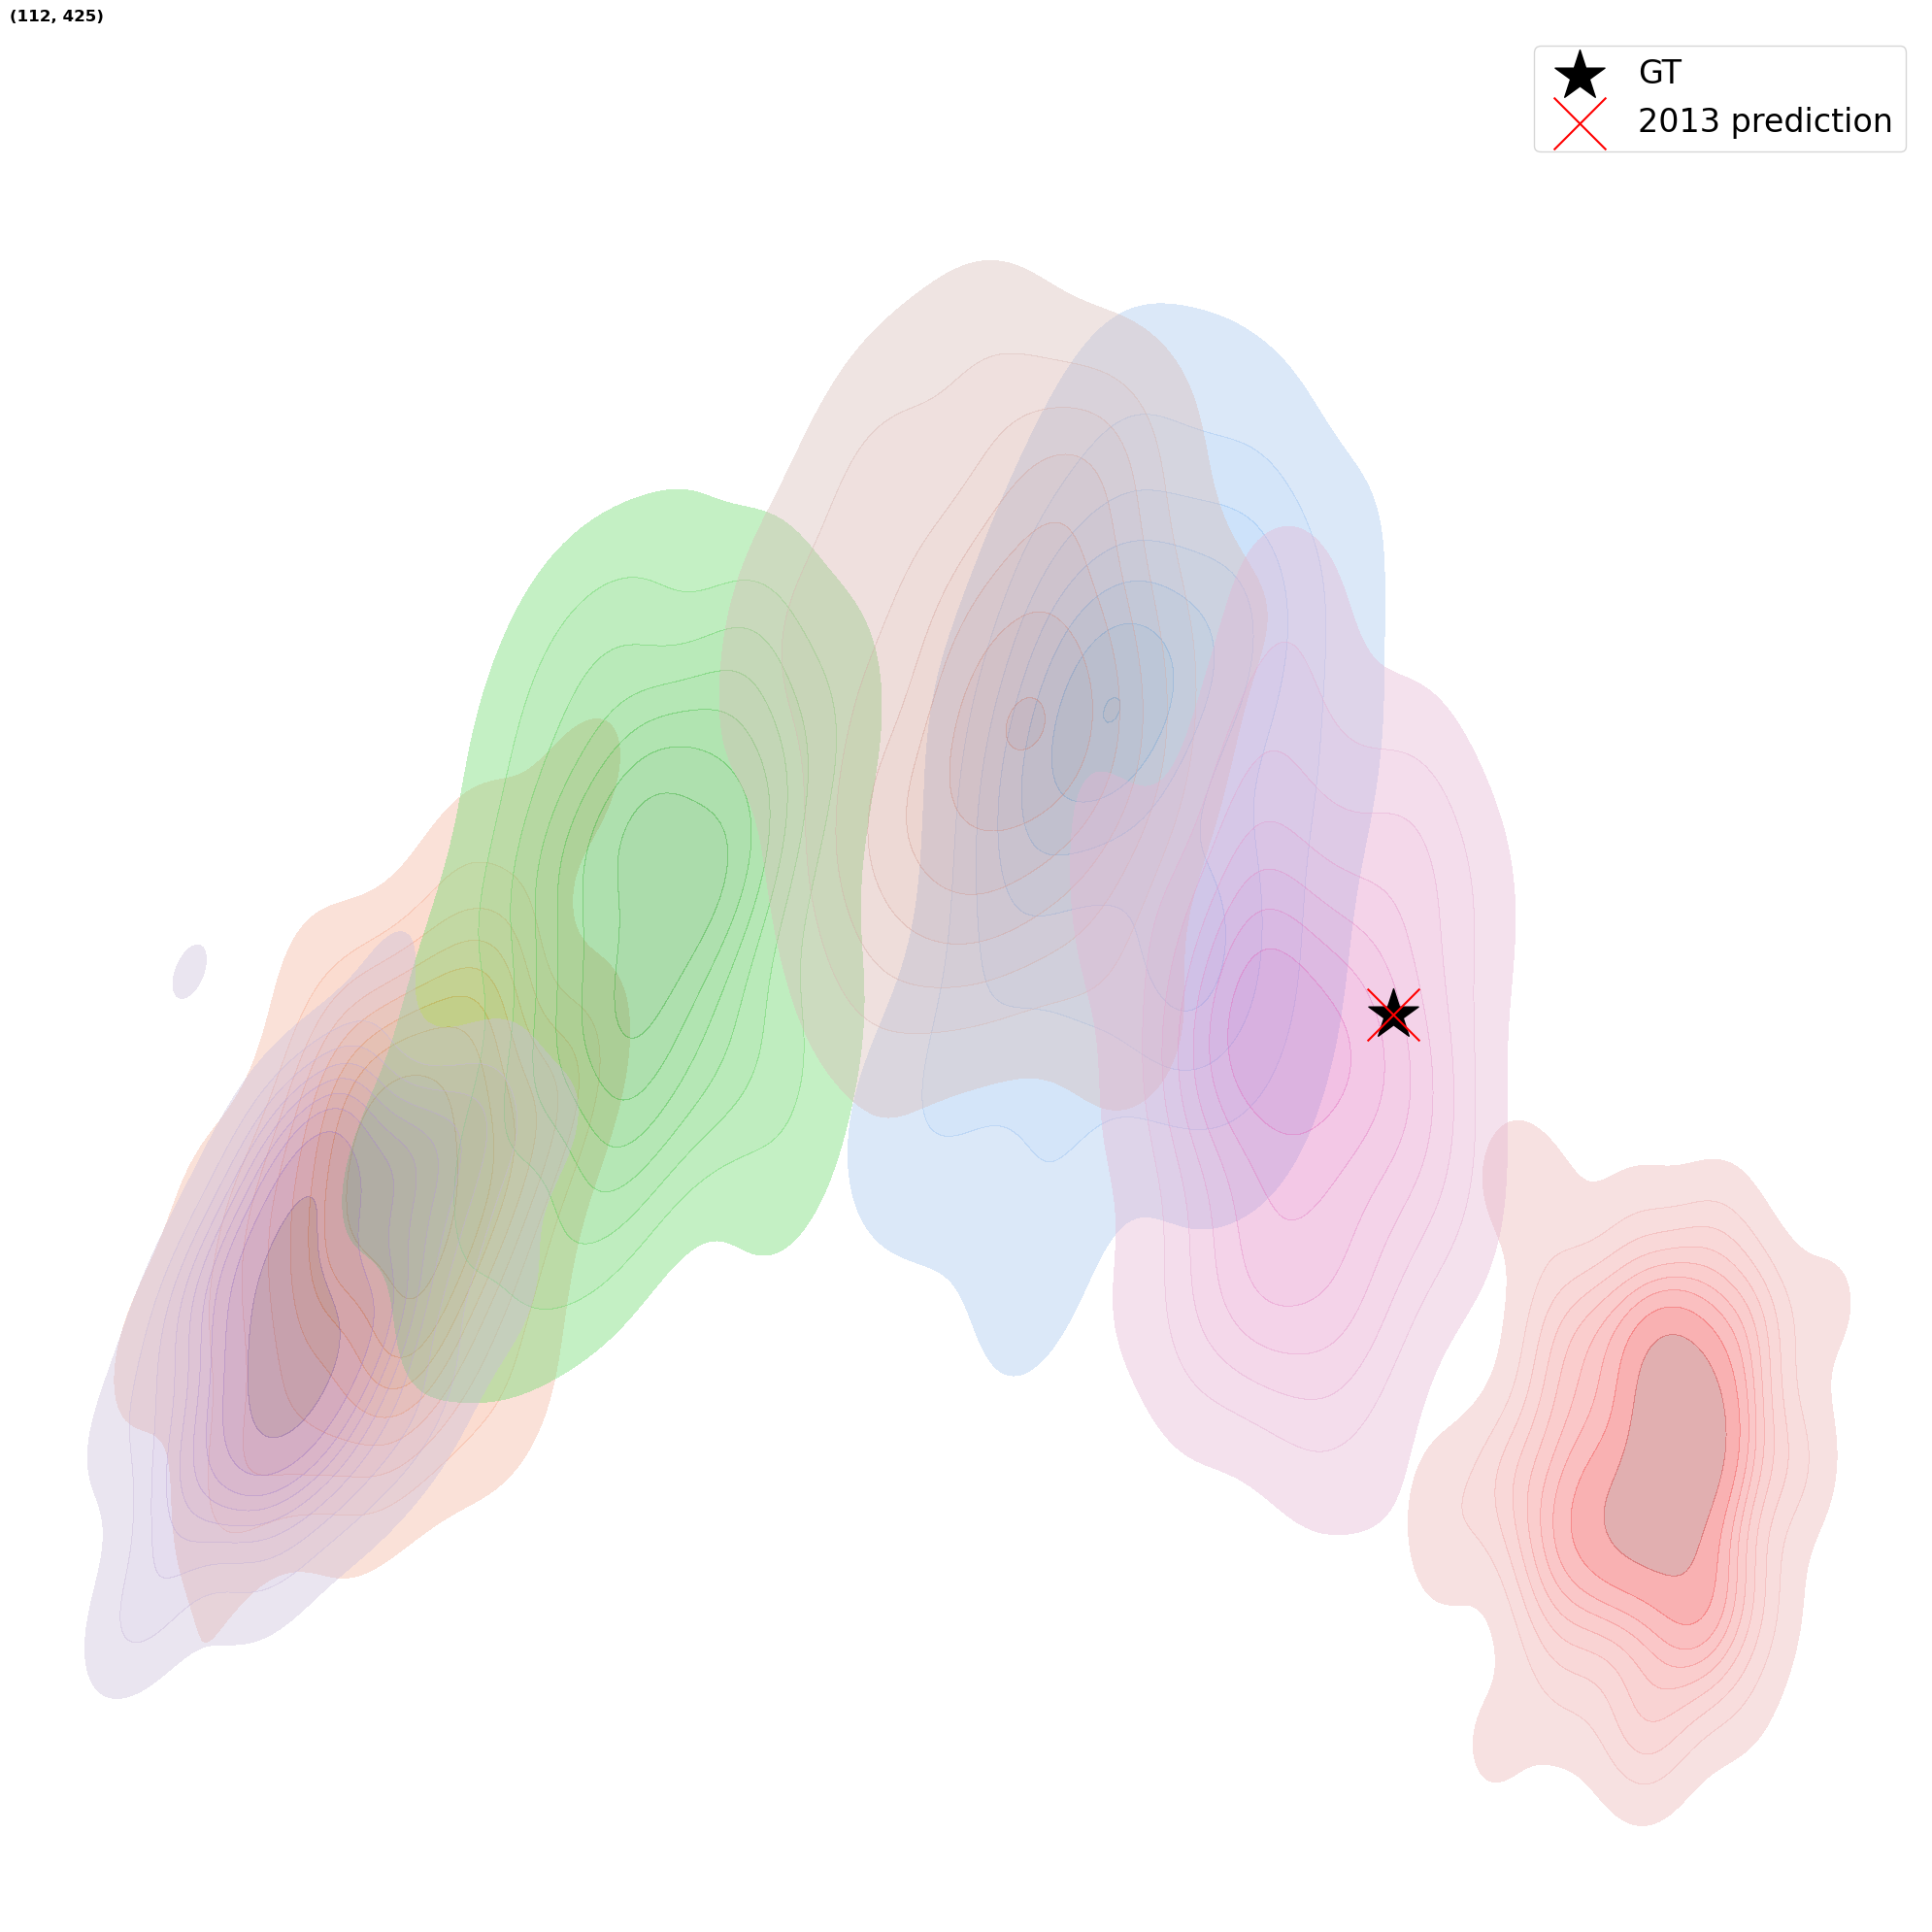

In [114]:
deep_netana.visualise(visualise_ve=visualise_kde, dark_mode=False, return_fig = True)
plt.scatter(words_emb[0], words_emb[1]
            , c='k'
            , marker='*'
            , s=1500
            , label = "GT"
           )

plt.scatter(words_emb[0], words_emb[1]
            , c='r'
            , marker='x'
            , s=1500
            , label = "2013 prediction"
           )

plt.legend(fontsize=24)

# Networks visualisation

In [12]:
import igraph as ig
import networkx as nx

In [13]:
import seaborn as sns

OSError: Cannot load file. If fname is a file name, that filename may be incorrect.

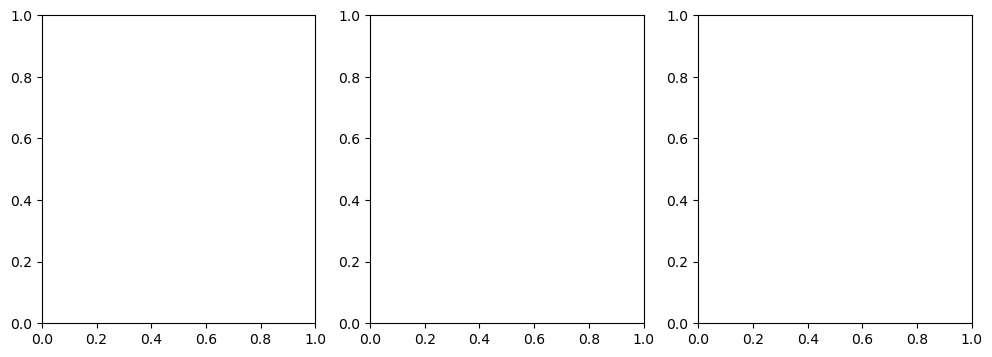

In [90]:
fams_types = [("ID", "id"), ("ER", "c1"), ("PA", "k"), ("PA'", "k^k"), ("d", "d"), ("SC", "sc-a")]

n = 100
#m = numbers_of_edges(n)[0]
net_ind = 34

default_net_str = "v{vc}_e{ec}/{fam}/{ty}_{ind}.pickle"
colors = sns.color_palette("colorblind")

for i, ft in enumerate(fams_types):
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12,4))
    for j in [0, 1, 2]:
        net_to_load = default_net_str.format(
            vc = n,
            ec = numbers_of_edges(n)[j],#m,#
            fam = ft[0],
            ty = ft[1],
            ind = net_ind,#net_ind+j,
        )
        net = load_net(DATA_PATH+net_to_load, directed=False)
        nx.draw(net.graph.to_networkx(),
                node_color=[colors[i]],
                node_size=12,
                alpha=0.5,
                ax = axes[j]
               )
    plt.suptitle("Fam: {f} | Gen: {t}".format(f=ft[0], t=ft[1]))

In [33]:
import matplotlib.pyplot as plt
from synthetic.net import load_net

In [56]:
n = 500
m = 5000
net_ind = 50

"v{}_e{}/ID/id_{}.pickle".format(n,m,net_ind)

id_net = load_net(DATA_PATH+"v{}_e{}/ID/id_{}.pickle".format(n,m,net_ind)#"v90_e160/ID/id_1.pickle"
                  , directed=False)
k_net = load_net(DATA_PATH+"v{}_e{}/PA/k_{}.pickle".format(n,m,net_ind)#"v90_e160/PA/k_1.pickle"
                 , directed=False)
er_net = load_net(DATA_PATH+"v{}_e{}/ER/c1_{}.pickle".format(n,m,net_ind)#"v90_e160/ER/c1_1.pickle"
                  , directed=False)

In [57]:
k_net.graph.vcount(), er_net.graph.ecount()

(500, 5000)

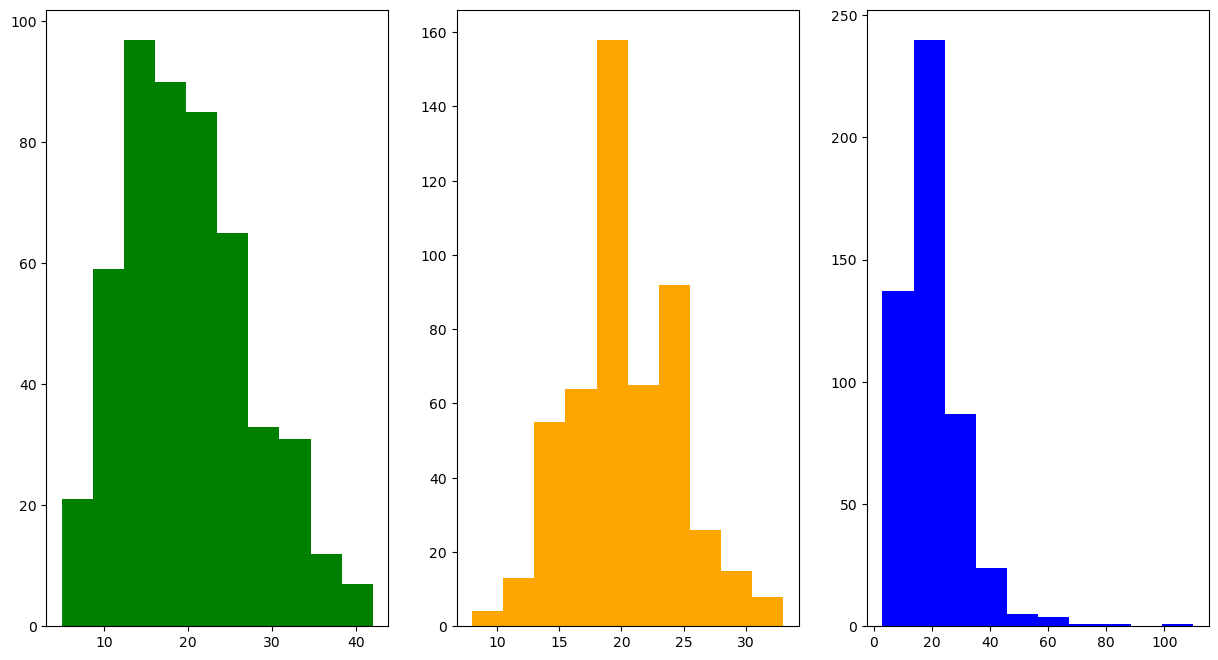

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15,8))
ax[0].hist(id_net.graph.degree(), color="g")
ax[1].hist(er_net.graph.degree(), color="orange")
ax[2].hist(k_net.graph.degree(), color="b")
plt.show()